In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from subprocess import check_output
%matplotlib inline

In [2]:
df=pd.read_csv('C:\\Users\\p860n111\\Desktop\\data science\\Hw2\\Shakespeare_data.csv')

In [3]:
df.describe

<bound method NDFrame.describe of         Dataline            Play  PlayerLinenumber ActSceneLine  \
0              1        Henry IV               NaN          NaN   
1              2        Henry IV               NaN          NaN   
2              3        Henry IV               NaN          NaN   
3              4        Henry IV               1.0        1.1.1   
4              5        Henry IV               1.0        1.1.2   
5              6        Henry IV               1.0        1.1.3   
6              7        Henry IV               1.0        1.1.4   
7              8        Henry IV               1.0        1.1.5   
8              9        Henry IV               1.0        1.1.6   
9             10        Henry IV               1.0        1.1.7   
10            11        Henry IV               1.0        1.1.8   
11            12        Henry IV               1.0        1.1.9   
12            13        Henry IV               1.0       1.1.10   
13            14        Henr

In [6]:
#to check the values for columns that have NaN value in them 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111396 entries, 0 to 111395
Data columns (total 6 columns):
Dataline            111396 non-null int64
Play                111396 non-null object
PlayerLinenumber    111393 non-null float64
ActSceneLine        105153 non-null object
Player              111389 non-null object
PlayerLine          111396 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 5.1+ MB
None


In [10]:
df.head(10)

Dataline      Play  PlayerLinenumber ActSceneLine         Player  \
0         1  Henry IV               NaN          NaN            NaN   
1         2  Henry IV               NaN          NaN            NaN   
2         3  Henry IV               NaN          NaN            NaN   
3         4  Henry IV               1.0        1.1.1  KING HENRY IV   
4         5  Henry IV               1.0        1.1.2  KING HENRY IV   
5         6  Henry IV               1.0        1.1.3  KING HENRY IV   
6         7  Henry IV               1.0        1.1.4  KING HENRY IV   
7         8  Henry IV               1.0        1.1.5  KING HENRY IV   
8         9  Henry IV               1.0        1.1.6  KING HENRY IV   
9        10  Henry IV               1.0        1.1.7  KING HENRY IV   

                                          PlayerLine  
0                                              ACT I  
1                       SCENE I. London. The palace.  
2  Enter KING HENRY, LORD JOHN OF LANCASTER, the ...  
3             So shaken as we are, so wan with care,  
4         Find we a time for frighted peace to pant,  
5     And breathe short-winded accents of new broils  
6            To be commenced in strands afar remote.  
7          No more the thirsty entrance of this soil  
8  Shall daub her lips with her own children's bl...  
9   Nor more shall trenching war channel her fields,

In [11]:
df.describe()

Dataline  PlayerLinenumber
count  111396.000000     111393.000000
mean    55698.500000         36.885334
std     32157.399631         39.985840
min         1.000000          1.000000
25%     27849.750000         10.000000
50%     55698.500000         25.000000
75%     83547.250000         50.000000
max    111396.000000        405.000000

In [14]:
# to see the total number of columns in the dataset.
df.columns

Index(['Dataline', 'Play', 'PlayerLinenumber', 'ActSceneLine', 'Player',
       'PlayerLine'],
      dtype='object')

In [16]:
#to find the total number of unique play
print("Number of plays are: " + str(df['Play'].nunique()))

Number of plays are: 36


In [17]:
# to replace the NaN value in the Player column to be Unknown
df['Player'].replace(np.nan, 'Unknown',inplace = True)

In [19]:
# to check that the Player column has all i.e. 111396 non null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111396 entries, 0 to 111395
Data columns (total 6 columns):
Dataline            111396 non-null int64
Play                111396 non-null object
PlayerLinenumber    111393 non-null float64
ActSceneLine        105153 non-null object
Player              111396 non-null object
PlayerLine          111396 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 5.1+ MB


In [20]:
# to verify that the missing values in Palyer column got replaced by Unknown
df.head()

Dataline      Play  PlayerLinenumber ActSceneLine         Player  \
0         1  Henry IV               NaN          NaN        Unknown   
1         2  Henry IV               NaN          NaN        Unknown   
2         3  Henry IV               NaN          NaN        Unknown   
3         4  Henry IV               1.0        1.1.1  KING HENRY IV   
4         5  Henry IV               1.0        1.1.2  KING HENRY IV   

                                          PlayerLine  
0                                              ACT I  
1                       SCENE I. London. The palace.  
2  Enter KING HENRY, LORD JOHN OF LANCASTER, the ...  
3             So shaken as we are, so wan with care,  
4         Find we a time for frighted peace to pant,

In [24]:
# to print the count of unique plays and their names
print("The total number of plays are: " + str(df['Play'].nunique())+" and their names are as follows: " + str(df['Play'].unique()))

The total number of plays are: 36 and their names are as follows: ['Henry IV' 'Henry VI Part 1' 'Henry VI Part 2' 'Henry VI Part 3'
 'Alls well that ends well' 'As you like it' 'Antony and Cleopatra'
 'A Comedy of Errors' 'Coriolanus' 'Cymbeline' 'Hamlet' 'Henry V'
 'Henry VIII' 'King John' 'Julius Caesar' 'King Lear' 'Loves Labours Lost'
 'macbeth' 'Measure for measure' 'Merchant of Venice'
 'Merry Wives of Windsor' 'A Midsummer nights dream'
 'Much Ado about nothing' 'Othello' 'Pericles' 'Richard II' 'Richard III'
 'Romeo and Juliet' 'Taming of the Shrew' 'The Tempest' 'Timon of Athens'
 'Titus Andronicus' 'Troilus and Cressida' 'Twelfth Night'
 'Two Gentlemen of Verona' 'A Winters Tale']


In [25]:
#creating a new data frame that will contain unique Plays value as a new column named: Name of the Play

pd.DataFrame(df['Play'].unique().tolist(), columns=['Name of the Play'])

Name of the Play
0                   Henry IV
1            Henry VI Part 1
2            Henry VI Part 2
3            Henry VI Part 3
4   Alls well that ends well
5             As you like it
6       Antony and Cleopatra
7         A Comedy of Errors
8                 Coriolanus
9                  Cymbeline
10                    Hamlet
11                   Henry V
12                Henry VIII
13                 King John
14             Julius Caesar
15                 King Lear
16        Loves Labours Lost
17                   macbeth
18       Measure for measure
19        Merchant of Venice
20    Merry Wives of Windsor
21  A Midsummer nights dream
22    Much Ado about nothing
23                   Othello
24                  Pericles
25                Richard II
26               Richard III
27          Romeo and Juliet
28       Taming of the Shrew
29               The Tempest
30           Timon of Athens
31          Titus Andronicus
32      Troilus and Cressida
33             Twelfth Night
34   Two Gentlemen of Verona
35            A Winters Tale

In [27]:
# Additional Information 1: For each Play, number of lines (PlayerLine) spoken by each PlaYer

df.groupby(['Play','Player']).count()['PlayerLine']


Play                      Player            
A Comedy of Errors        ADRIANA               284
                          AEGEON                150
                          AEMELIA                75
                          ANGELO                 99
                          ANTIPHOLUS              6
                          BALTHAZAR              31
                          Courtezan              43
                          DROMIO OF EPHESUS     191
                          DROMIO OF SYRACUSE    323
                          DUKE SOLINUS           97
                          First Merchant         19
                          Gaoler                  1
                          LUCE                   11
                          LUCIANA               118
                          OCTAVIUS CAESAR         3
                          OF EPHESUS            221
                          OF SYRACUSE           292
                          Officer                17
                   

In [28]:
# Now converting the above data into a frame (playWise_lines_per_player).

playWise_lines_per_player= df.groupby(['Play','Player']).count()['PlayerLine']
playWise_lines_per_player= playWise_lines_per_player.to_frame()
playWise_lines_per_player

PlayerLine
Play                     Player                        
A Comedy of Errors       ADRIANA                    284
                         AEGEON                     150
                         AEMELIA                     75
                         ANGELO                      99
                         ANTIPHOLUS                   6
                         BALTHAZAR                   31
                         Courtezan                   43
                         DROMIO OF EPHESUS          191
                         DROMIO OF SYRACUSE         323
                         DUKE SOLINUS                97
                         First Merchant              19
                         Gaoler                       1
                         LUCE                        11
                         LUCIANA                    118
                         OCTAVIUS CAESAR              3
                         OF EPHESUS                 221
                         OF SYRACUSE                292
                         Officer                     17
                         PINCH                       17
                         Second Merchant             41
                         Servant                     16
A Midsummer nights dream ALL                          2
                         BOTTOM                     220
                         COBWEB                       4
                         DEMETRIUS                  144
                         EGEUS                       42
                         FLUTE                       26
                         FORD                         3
                         Fairy                       33
                         HELENA                     237
...                                                 ...
macbeth                  First Murderer              35
                         First Witch                 68
                         Gentlewoman                 27
                         HECATE                      43
                         LADY MACBETH               279
                         LADY MACDUFF                43
                         LENNOX                      79
                         Lord                        25
                         Lords                        4
                         MACBETH                    783
                         MACDUFF                    193
                         MALCOLM                    222
                         MENTEITH                    12
                         Messenger                   24
                         Old Man                     15
                         Porter                      53
                         ROSS                       137
                         SEYTON                       6
                         SIWARD                      37
                         Second Apparition            5
                         Second Murderer             16
                         Second Witch                29
                         Sergeant                    35
                         Servant                      6
                         Soldiers                     1
                         Son                         24
                         Third Apparition             6
                         Third Murderer               8
                         Third Witch                 27
                         YOUNG SIWARD                 8

[1328 rows x 1 columns]

In [29]:
playWise_lines_per_player.describe()

PlayerLine
count  1328.000000
mean     83.882530
std     149.184171
min       1.000000
25%       6.000000
50%      23.000000
75%      86.500000
max    1582.000000

In [33]:
# Additional Information 2: To count the number of PlayerLine corresponding to each Play.

df.groupby('Play').count().sort_values(by='PlayerLine',ascending=True)['PlayerLine']

Play
A Comedy of Errors          2055
A Midsummer nights dream    2300
Two Gentlemen of Verona     2357
The Tempest                 2403
macbeth                     2586
Pericles                    2641
Twelfth Night               2648
Timon of Athens             2662
Much Ado about nothing      2704
Titus Andronicus            2726
King John                   2766
Julius Caesar               2771
Merchant of Venice          2802
Taming of the Shrew         2806
As you like it              2822
Merry Wives of Windsor      2831
Richard II                  2937
Henry VI Part 1             2983
Loves Labours Lost          2986
Measure for measure         2998
Alls well that ends well    3083
Henry VI Part 3             3138
Henry IV                    3205
Romeo and Juliet            3313
Henry VI Part 2             3334
Henry V                     3395
Henry VIII                  3419
A Winters Tale              3489
Troilus and Cressida        3711
Othello                     3762
King 

In [44]:
#Converting the data into a dataframe (playerLinePerPlay)
playerLinePerPlay = df.groupby('Play').count().sort_values(by='PlayerLine',ascending=True)['PlayerLine']

In [45]:
playerLinePerPlay

Play
A Comedy of Errors          2055
A Midsummer nights dream    2300
Two Gentlemen of Verona     2357
The Tempest                 2403
macbeth                     2586
Pericles                    2641
Twelfth Night               2648
Timon of Athens             2662
Much Ado about nothing      2704
Titus Andronicus            2726
King John                   2766
Julius Caesar               2771
Merchant of Venice          2802
Taming of the Shrew         2806
As you like it              2822
Merry Wives of Windsor      2831
Richard II                  2937
Henry VI Part 1             2983
Loves Labours Lost          2986
Measure for measure         2998
Alls well that ends well    3083
Henry VI Part 3             3138
Henry IV                    3205
Romeo and Juliet            3313
Henry VI Part 2             3334
Henry V                     3395
Henry VIII                  3419
A Winters Tale              3489
Troilus and Cressida        3711
Othello                     3762
King 

In [46]:
playerLinePerPlay = playerLinePerPlay.to_frame()

In [47]:
playerLinePerPlay

PlayerLine
Play                                
A Comedy of Errors              2055
A Midsummer nights dream        2300
Two Gentlemen of Verona         2357
The Tempest                     2403
macbeth                         2586
Pericles                        2641
Twelfth Night                   2648
Timon of Athens                 2662
Much Ado about nothing          2704
Titus Andronicus                2726
King John                       2766
Julius Caesar                   2771
Merchant of Venice              2802
Taming of the Shrew             2806
As you like it                  2822
Merry Wives of Windsor          2831
Richard II                      2937
Henry VI Part 1                 2983
Loves Labours Lost              2986
Measure for measure             2998
Alls well that ends well        3083
Henry VI Part 3                 3138
Henry IV                        3205
Romeo and Juliet                3313
Henry VI Part 2                 3334
Henry V                         3395
Henry VIII                      3419
A Winters Tale                  3489
Troilus and Cressida            3711
Othello                         3762
King Lear                       3766
Antony and Cleopatra            3862
Richard III                     3941
Cymbeline                       3958
Coriolanus                      3992
Hamlet                          4244

In [48]:
# applying indexing to the above dataframe
playerLinePerPlay['Play'] = playerLinePerPlay.index.tolist()

In [49]:
playerLinePerPlay

PlayerLine                      Play
Play                                                          
A Comedy of Errors              2055        A Comedy of Errors
A Midsummer nights dream        2300  A Midsummer nights dream
Two Gentlemen of Verona         2357   Two Gentlemen of Verona
The Tempest                     2403               The Tempest
macbeth                         2586                   macbeth
Pericles                        2641                  Pericles
Twelfth Night                   2648             Twelfth Night
Timon of Athens                 2662           Timon of Athens
Much Ado about nothing          2704    Much Ado about nothing
Titus Andronicus                2726          Titus Andronicus
King John                       2766                 King John
Julius Caesar                   2771             Julius Caesar
Merchant of Venice              2802        Merchant of Venice
Taming of the Shrew             2806       Taming of the Shrew
As you like it                  2822            As you like it
Merry Wives of Windsor          2831    Merry Wives of Windsor
Richard II                      2937                Richard II
Henry VI Part 1                 2983           Henry VI Part 1
Loves Labours Lost              2986        Loves Labours Lost
Measure for measure             2998       Measure for measure
Alls well that ends well        3083  Alls well that ends well
Henry VI Part 3                 3138           Henry VI Part 3
Henry IV                        3205                  Henry IV
Romeo and Juliet                3313          Romeo and Juliet
Henry VI Part 2                 3334           Henry VI Part 2
Henry V                         3395                   Henry V
Henry VIII                      3419                Henry VIII
A Winters Tale                  3489            A Winters Tale
Troilus and Cressida            3711      Troilus and Cressida
Othello                         3762                   Othello
King Lear                       3766                 King Lear
Antony and Cleopatra            3862      Antony and Cleopatra
Richard III                     3941               Richard III
Cymbeline                       3958                 Cymbeline
Coriolanus                      3992                Coriolanus
Hamlet                          4244                    Hamlet

In [50]:
playerLinePerPlay.index = np.arange(0,len(playerLinePerPlay))

In [51]:
playerLinePerPlay

PlayerLine                      Play
0         2055        A Comedy of Errors
1         2300  A Midsummer nights dream
2         2357   Two Gentlemen of Verona
3         2403               The Tempest
4         2586                   macbeth
5         2641                  Pericles
6         2648             Twelfth Night
7         2662           Timon of Athens
8         2704    Much Ado about nothing
9         2726          Titus Andronicus
10        2766                 King John
11        2771             Julius Caesar
12        2802        Merchant of Venice
13        2806       Taming of the Shrew
14        2822            As you like it
15        2831    Merry Wives of Windsor
16        2937                Richard II
17        2983           Henry VI Part 1
18        2986        Loves Labours Lost
19        2998       Measure for measure
20        3083  Alls well that ends well
21        3138           Henry VI Part 3
22        3205                  Henry IV
23        3313          Romeo and Juliet
24        3334           Henry VI Part 2
25        3395                   Henry V
26        3419                Henry VIII
27        3489            A Winters Tale
28        3711      Troilus and Cressida
29        3762                   Othello
30        3766                 King Lear
31        3862      Antony and Cleopatra
32        3941               Richard III
33        3958                 Cymbeline
34        3992                Coriolanus
35        4244                    Hamlet

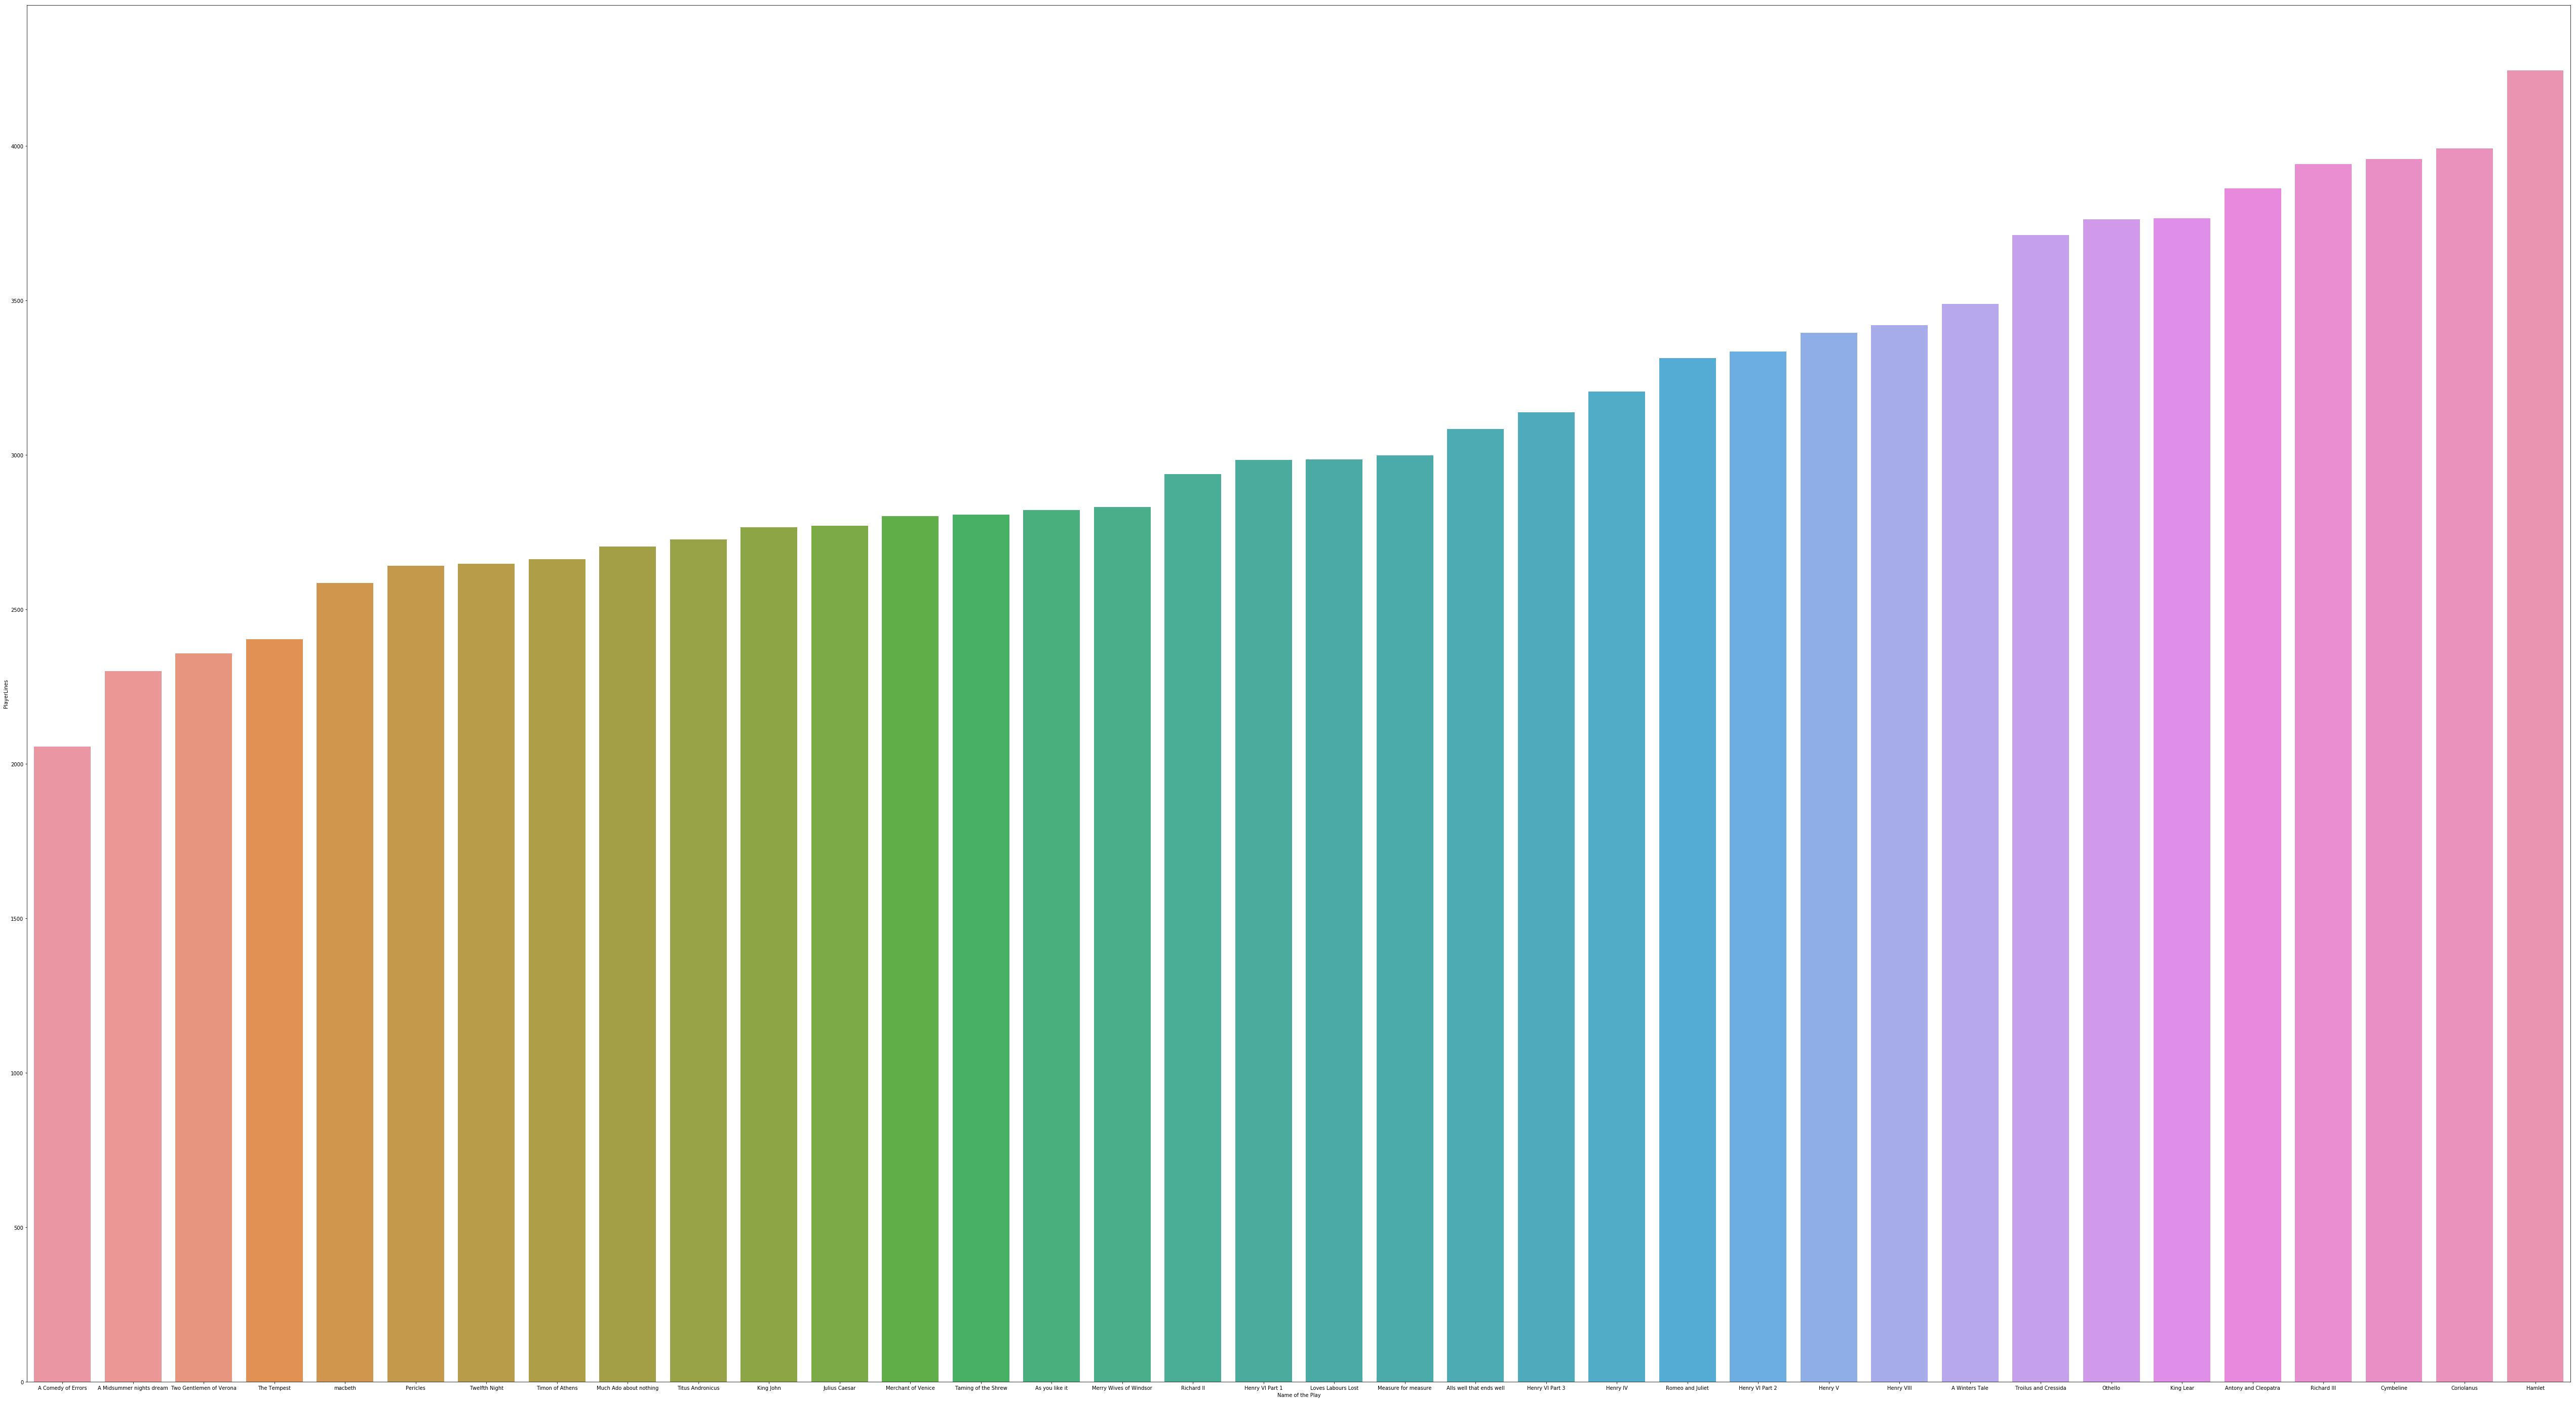

In [58]:
# plotting a graph to show: PlayerLine against Name of the Play
plt.figure(figsize=(90,50))
ax= sns.barplot(x='Play',y='PlayerLine',data=playerLinePerPlay, order = playerLinePerPlay['Play'])
ax.set(xlabel='Name of the Play', ylabel='PlayerLines')
plt.show()

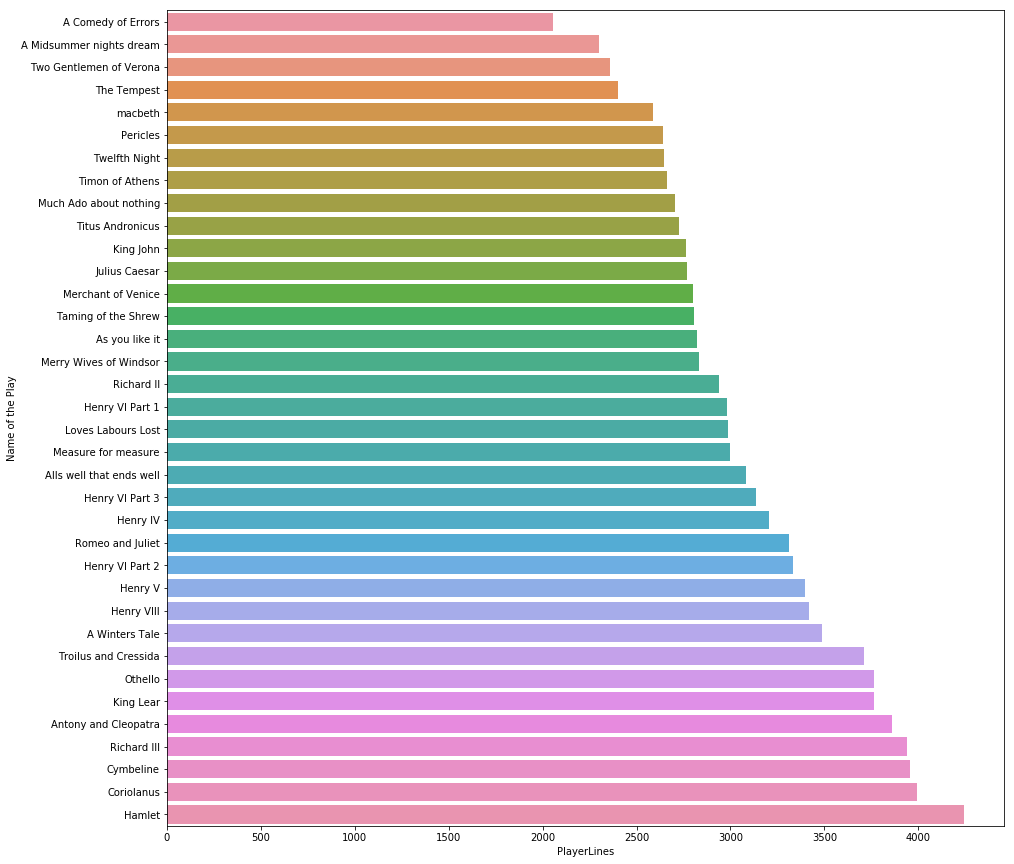

In [61]:
plt.figure(figsize=(15,15))
ax= sns.barplot(x='PlayerLine',y='Play',data=playerLinePerPlay, order = playerLinePerPlay['Play'])
ax.set(xlabel='PlayerLines', ylabel='Name of the Play')
plt.show()

In [63]:
# Additional Information 3: Number of Players corresponding to each Play

playersPerPlay = df.groupby(['Play'])['Player'].nunique().sort_values(ascending= True)

In [64]:
playersPerPlay

Play
Two Gentlemen of Verona     18
Twelfth Night               19
The Tempest                 20
A Comedy of Errors          21
Loves Labours Lost          21
Much Ado about nothing      24
Merchant of Venice          24
Merry Wives of Windsor      25
Alls well that ends well    26
Measure for measure         26
King Lear                   27
Titus Andronicus            28
As you like it              28
Othello                     29
Troilus and Cressida        29
King John                   29
A Midsummer nights dream    31
Hamlet                      35
A Winters Tale              36
Henry IV                    36
Romeo and Juliet            37
Richard II                  37
Taming of the Shrew         38
macbeth                     42
Cymbeline                   42
Henry VI Part 3             46
Henry VIII                  47
Henry V                     47
Pericles                    48
Julius Caesar               51
Henry VI Part 1             53
Antony and Cleopatra        55
Tim

In [65]:
#changing to it to dataframe
playersPerPlay=playersPerPlay.to_frame()

In [66]:
playersPerPlay

Player
Play                            
Two Gentlemen of Verona       18
Twelfth Night                 19
The Tempest                   20
A Comedy of Errors            21
Loves Labours Lost            21
Much Ado about nothing        24
Merchant of Venice            24
Merry Wives of Windsor        25
Alls well that ends well      26
Measure for measure           26
King Lear                     27
Titus Andronicus              28
As you like it                28
Othello                       29
Troilus and Cressida          29
King John                     29
A Midsummer nights dream      31
Hamlet                        35
A Winters Tale                36
Henry IV                      36
Romeo and Juliet              37
Richard II                    37
Taming of the Shrew           38
macbeth                       42
Cymbeline                     42
Henry VI Part 3               46
Henry VIII                    47
Henry V                       47
Pericles                      48
Julius Caesar                 51
Henry VI Part 1               53
Antony and Cleopatra          55
Timon of Athens               55
Coriolanus                    62
Henry VI Part 2               65
Richard III                   71

In [67]:
playersPerPlay['Play'] = playersPerPlay.index.tolist()

In [68]:
playersPerPlay

Player                      Play
Play                                                      
Two Gentlemen of Verona       18   Two Gentlemen of Verona
Twelfth Night                 19             Twelfth Night
The Tempest                   20               The Tempest
A Comedy of Errors            21        A Comedy of Errors
Loves Labours Lost            21        Loves Labours Lost
Much Ado about nothing        24    Much Ado about nothing
Merchant of Venice            24        Merchant of Venice
Merry Wives of Windsor        25    Merry Wives of Windsor
Alls well that ends well      26  Alls well that ends well
Measure for measure           26       Measure for measure
King Lear                     27                 King Lear
Titus Andronicus              28          Titus Andronicus
As you like it                28            As you like it
Othello                       29                   Othello
Troilus and Cressida          29      Troilus and Cressida
King John                     29                 King John
A Midsummer nights dream      31  A Midsummer nights dream
Hamlet                        35                    Hamlet
A Winters Tale                36            A Winters Tale
Henry IV                      36                  Henry IV
Romeo and Juliet              37          Romeo and Juliet
Richard II                    37                Richard II
Taming of the Shrew           38       Taming of the Shrew
macbeth                       42                   macbeth
Cymbeline                     42                 Cymbeline
Henry VI Part 3               46           Henry VI Part 3
Henry VIII                    47                Henry VIII
Henry V                       47                   Henry V
Pericles                      48                  Pericles
Julius Caesar                 51             Julius Caesar
Henry VI Part 1               53           Henry VI Part 1
Antony and Cleopatra          55      Antony and Cleopatra
Timon of Athens               55           Timon of Athens
Coriolanus                    62                Coriolanus
Henry VI Part 2               65           Henry VI Part 2
Richard III                   71               Richard III

In [69]:
# now to change the index from Play to 0 - (length-1) adn renaming the column name 

playersPerPlay.columns = ['Number of Players','Name of the Play']

In [70]:
playersPerPlay

Number of Players          Name of the Play
Play                                                                 
Two Gentlemen of Verona                  18   Two Gentlemen of Verona
Twelfth Night                            19             Twelfth Night
The Tempest                              20               The Tempest
A Comedy of Errors                       21        A Comedy of Errors
Loves Labours Lost                       21        Loves Labours Lost
Much Ado about nothing                   24    Much Ado about nothing
Merchant of Venice                       24        Merchant of Venice
Merry Wives of Windsor                   25    Merry Wives of Windsor
Alls well that ends well                 26  Alls well that ends well
Measure for measure                      26       Measure for measure
King Lear                                27                 King Lear
Titus Andronicus                         28          Titus Andronicus
As you like it                           28            As you like it
Othello                                  29                   Othello
Troilus and Cressida                     29      Troilus and Cressida
King John                                29                 King John
A Midsummer nights dream                 31  A Midsummer nights dream
Hamlet                                   35                    Hamlet
A Winters Tale                           36            A Winters Tale
Henry IV                                 36                  Henry IV
Romeo and Juliet                         37          Romeo and Juliet
Richard II                               37                Richard II
Taming of the Shrew                      38       Taming of the Shrew
macbeth                                  42                   macbeth
Cymbeline                                42                 Cymbeline
Henry VI Part 3                          46           Henry VI Part 3
Henry VIII                               47                Henry VIII
Henry V                                  47                   Henry V
Pericles                                 48                  Pericles
Julius Caesar                            51             Julius Caesar
Henry VI Part 1                          53           Henry VI Part 1
Antony and Cleopatra                     55      Antony and Cleopatra
Timon of Athens                          55           Timon of Athens
Coriolanus                               62                Coriolanus
Henry VI Part 2                          65           Henry VI Part 2
Richard III                              71               Richard III

In [71]:
playersPerPlay.index= np.arange(0,len(playersPerPlay))
playersPerPlay

Number of Players          Name of the Play
0                  18   Two Gentlemen of Verona
1                  19             Twelfth Night
2                  20               The Tempest
3                  21        A Comedy of Errors
4                  21        Loves Labours Lost
5                  24    Much Ado about nothing
6                  24        Merchant of Venice
7                  25    Merry Wives of Windsor
8                  26  Alls well that ends well
9                  26       Measure for measure
10                 27                 King Lear
11                 28          Titus Andronicus
12                 28            As you like it
13                 29                   Othello
14                 29      Troilus and Cressida
15                 29                 King John
16                 31  A Midsummer nights dream
17                 35                    Hamlet
18                 36            A Winters Tale
19                 36                  Henry IV
20                 37          Romeo and Juliet
21                 37                Richard II
22                 38       Taming of the Shrew
23                 42                   macbeth
24                 42                 Cymbeline
25                 46           Henry VI Part 3
26                 47                Henry VIII
27                 47                   Henry V
28                 48                  Pericles
29                 51             Julius Caesar
30                 53           Henry VI Part 1
31                 55      Antony and Cleopatra
32                 55           Timon of Athens
33                 62                Coriolanus
34                 65           Henry VI Part 2
35                 71               Richard III

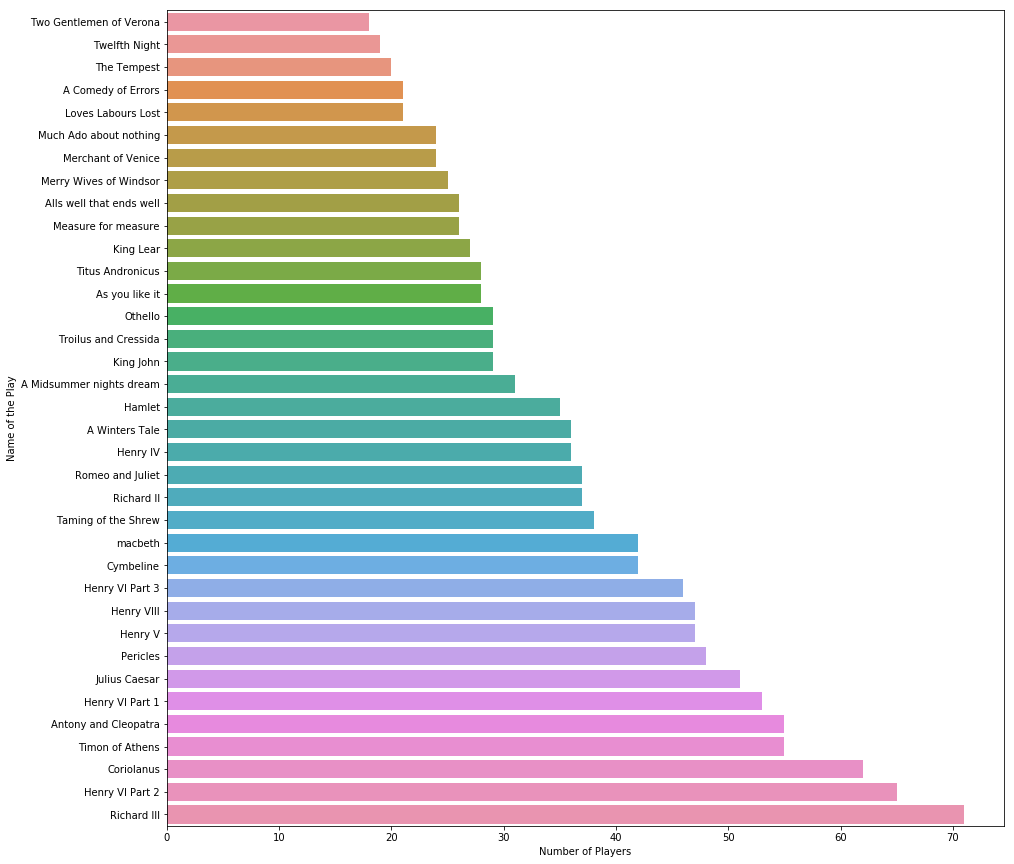

In [72]:
# plotting graph

plt.figure(figsize=(15,15))
ax = sns.barplot(x='Number of Players',y='Name of the Play',data=playersPerPlay)
ax.set(xlabel='Number of Players', ylabel='Name of the Play')
plt.show()

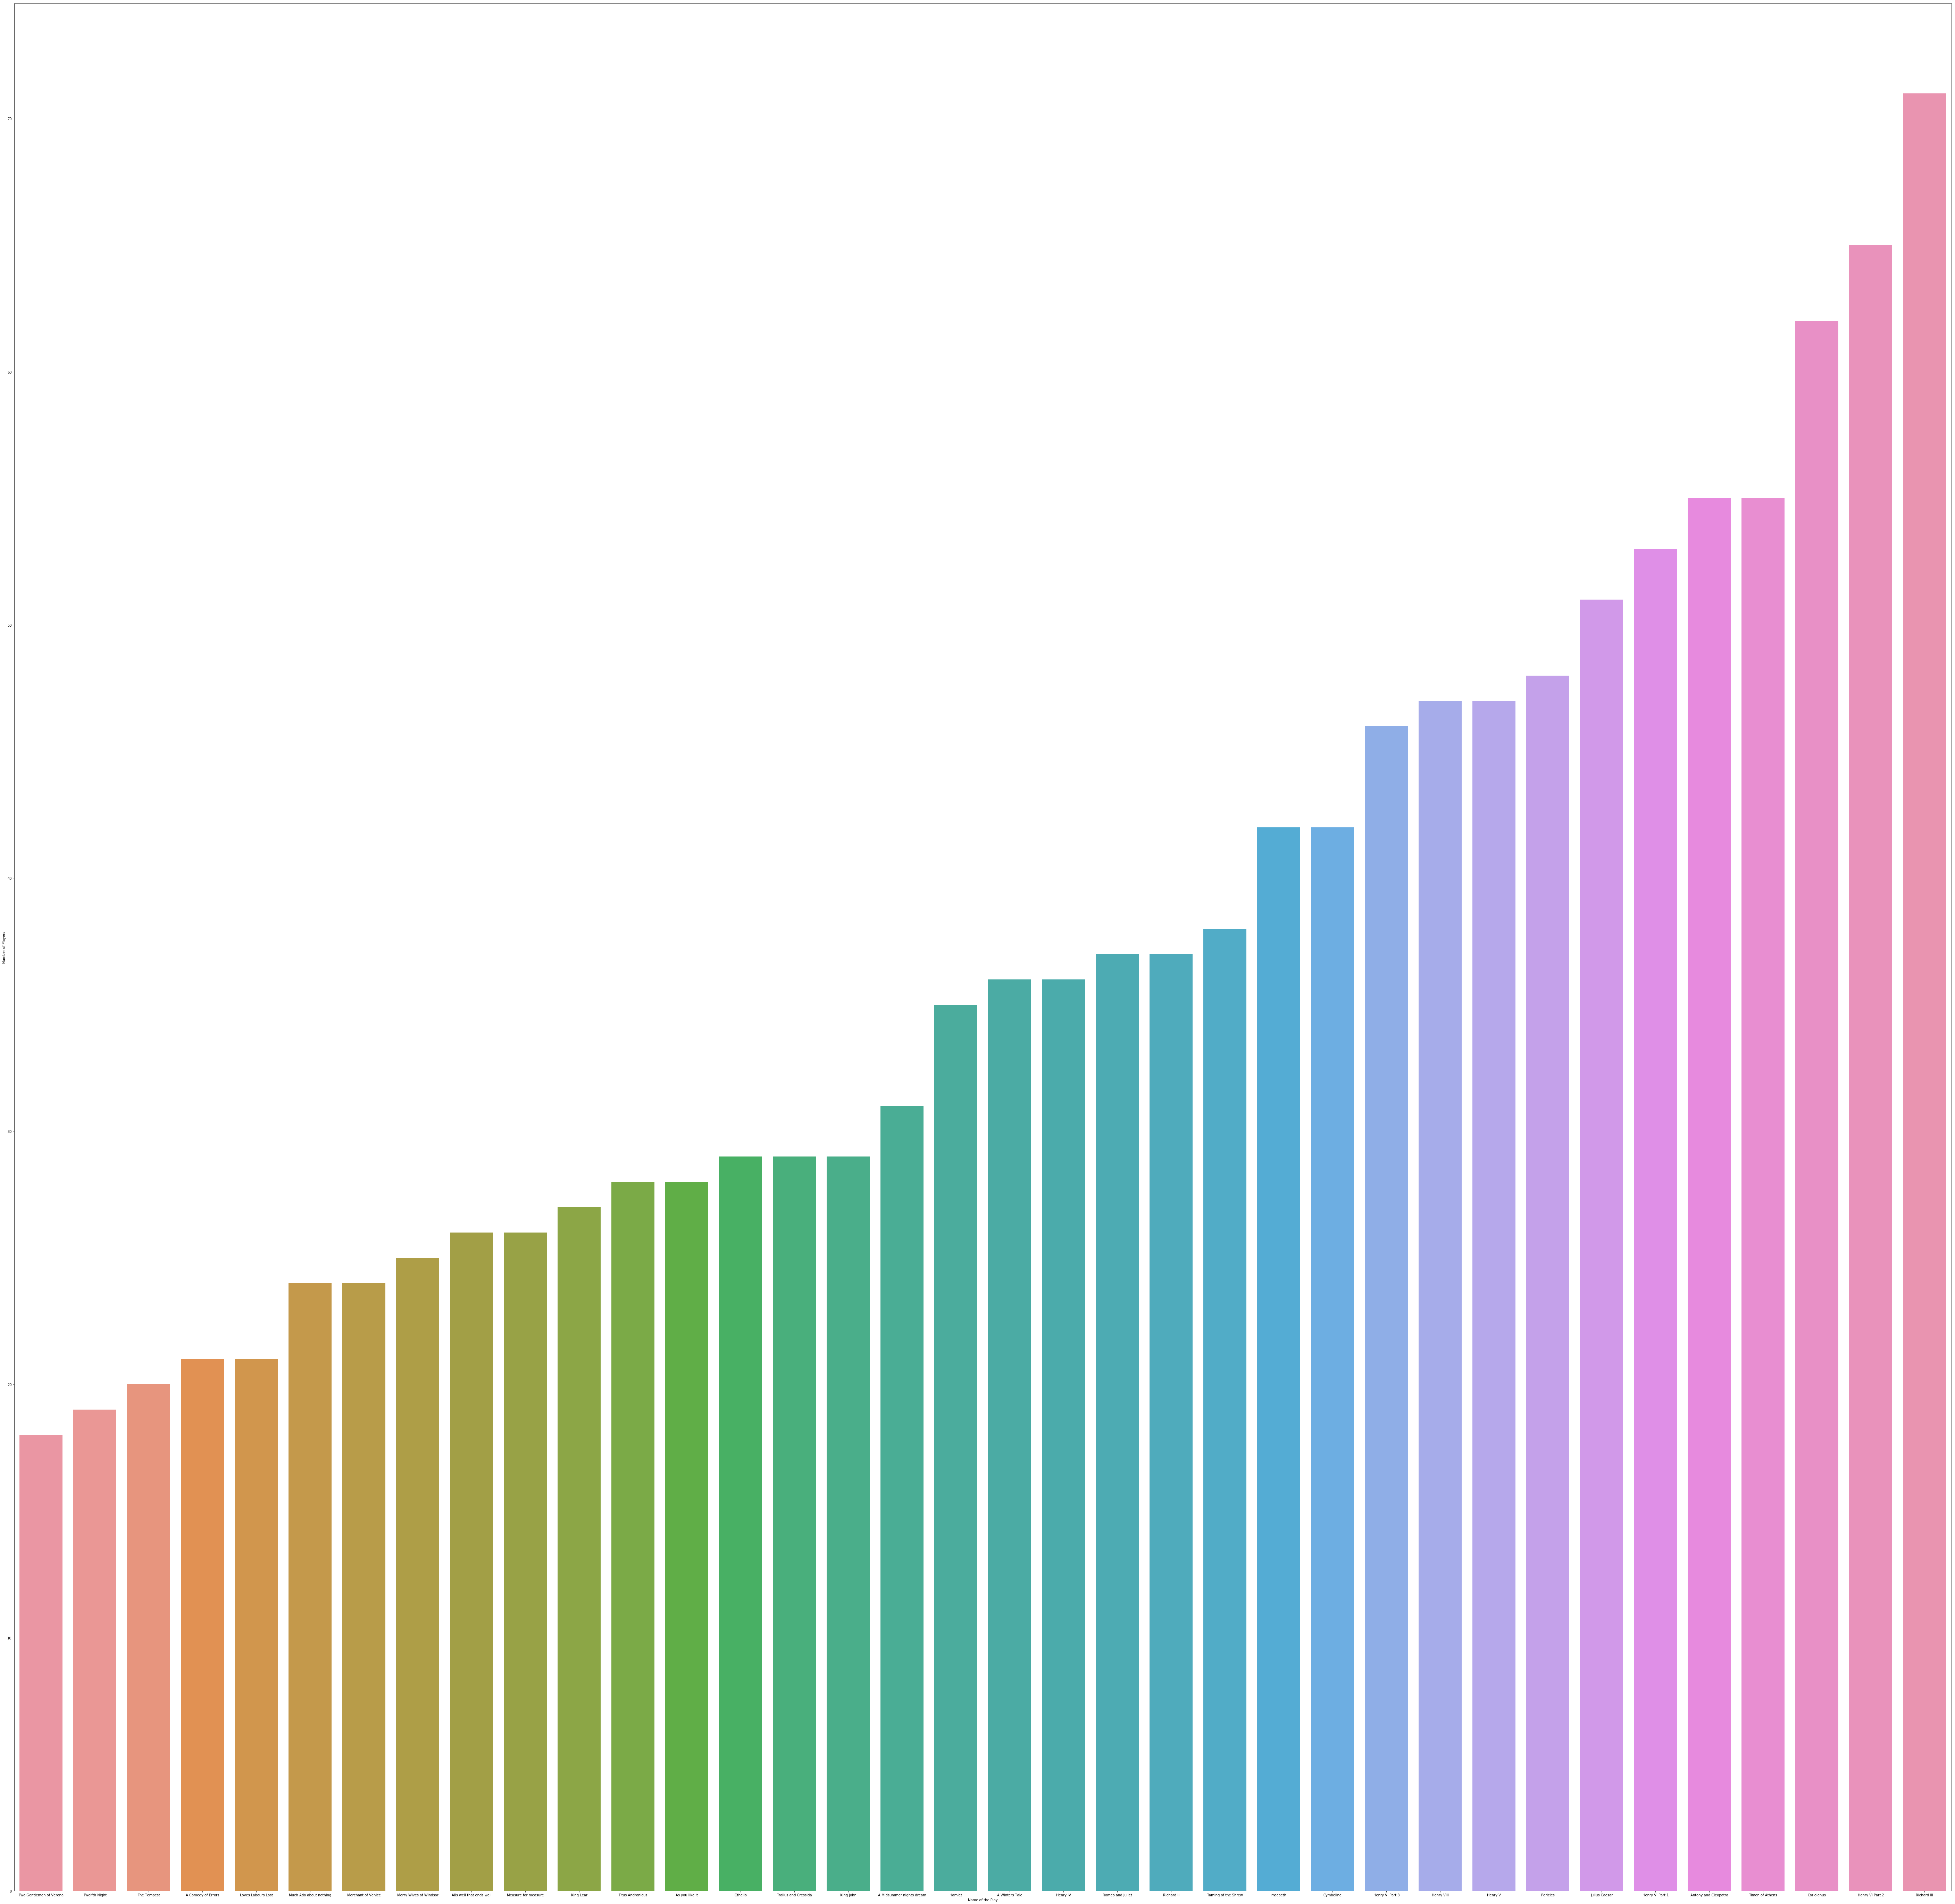

In [77]:
plt.figure(figsize=(100,100))
ax = sns.barplot(x='Name of the Play',y='Number of Players',data=playersPerPlay)
ax.set(xlabel='Name of the Play', ylabel='Number of Players')
plt.show()

In [82]:
# to calculate the total words in each PlayerLine cell entry
df['new_column'] = df.PlayerLine.apply(lambda x: len(str(x).split(' ')))

In [83]:
df

Dataline            Play  PlayerLinenumber ActSceneLine  \
0              1        Henry IV               NaN          NaN   
1              2        Henry IV               NaN          NaN   
2              3        Henry IV               NaN          NaN   
3              4        Henry IV               1.0        1.1.1   
4              5        Henry IV               1.0        1.1.2   
5              6        Henry IV               1.0        1.1.3   
6              7        Henry IV               1.0        1.1.4   
7              8        Henry IV               1.0        1.1.5   
8              9        Henry IV               1.0        1.1.6   
9             10        Henry IV               1.0        1.1.7   
10            11        Henry IV               1.0        1.1.8   
11            12        Henry IV               1.0        1.1.9   
12            13        Henry IV               1.0       1.1.10   
13            14        Henry IV               1.0       1.1.11   
14            15        Henry IV               1.0       1.1.12   
15            16        Henry IV               1.0       1.1.13   
16            17        Henry IV               1.0       1.1.14   
17            18        Henry IV               1.0       1.1.15   
18            19        Henry IV               1.0       1.1.16   
19            20        Henry IV               1.0       1.1.17   
20            21        Henry IV               1.0       1.1.18   
21            22        Henry IV               1.0       1.1.19   
22            23        Henry IV               1.0       1.1.20   
23            24        Henry IV               1.0       1.1.21   
24            25        Henry IV               1.0       1.1.22   
25            26        Henry IV               1.0       1.1.23   
26            27        Henry IV               1.0       1.1.24   
27            28        Henry IV               1.0       1.1.25   
28            29        Henry IV               1.0       1.1.26   
29            30        Henry IV               1.0       1.1.27   
...          ...             ...               ...          ...   
111366    111367  A Winters Tale              37.0      5.3.155   
111367    111368  A Winters Tale              37.0      5.3.156   
111368    111369  A Winters Tale              37.0      5.3.157   
111369    111370  A Winters Tale              37.0      5.3.158   
111370    111371  A Winters Tale              37.0      5.3.159   
111371    111372  A Winters Tale              37.0      5.3.160   
111372    111373  A Winters Tale              37.0      5.3.161   
111373    111374  A Winters Tale              37.0      5.3.162   
111374    111375  A Winters Tale              38.0      5.3.163   
111375    111376  A Winters Tale              38.0      5.3.164   
111376    111377  A Winters Tale              38.0      5.3.165   
111377    111378  A Winters Tale              38.0      5.3.166   
111378    111379  A Winters Tale              38.0      5.3.167   
111379    111380  A Winters Tale              38.0      5.3.168   
111380    111381  A Winters Tale              38.0      5.3.169   
111381    111382  A Winters Tale              38.0      5.3.170   
111382    111383  A Winters Tale              38.0      5.3.171   
111383    111384  A Winters Tale              38.0      5.3.172   
111384    111385  A Winters Tale              38.0      5.3.173   
111385    111386  A Winters Tale              38.0      5.3.174   
111386    111387  A Winters Tale              38.0      5.3.175   
111387    111388  A Winters Tale              38.0      5.3.176   
111388    111389  A Winters Tale              38.0      5.3.177   
111389    111390  A Winters Tale              38.0      5.3.178   
111390    111391  A Winters Tale              38.0      5.3.179   
111391    111392  A Winters Tale              38.0      5.3.180   
111392    111393  A Winters Tale              38.0      5.3.181   
111393    111394  A Winters Tale              38.0     

In [89]:
df.groupby(['Player'])['new_column']

In [90]:
df

Dataline            Play  PlayerLinenumber ActSceneLine  \
0              1        Henry IV               NaN          NaN   
1              2        Henry IV               NaN          NaN   
2              3        Henry IV               NaN          NaN   
3              4        Henry IV               1.0        1.1.1   
4              5        Henry IV               1.0        1.1.2   
5              6        Henry IV               1.0        1.1.3   
6              7        Henry IV               1.0        1.1.4   
7              8        Henry IV               1.0        1.1.5   
8              9        Henry IV               1.0        1.1.6   
9             10        Henry IV               1.0        1.1.7   
10            11        Henry IV               1.0        1.1.8   
11            12        Henry IV               1.0        1.1.9   
12            13        Henry IV               1.0       1.1.10   
13            14        Henry IV               1.0       1.1.11   
14            15        Henry IV               1.0       1.1.12   
15            16        Henry IV               1.0       1.1.13   
16            17        Henry IV               1.0       1.1.14   
17            18        Henry IV               1.0       1.1.15   
18            19        Henry IV               1.0       1.1.16   
19            20        Henry IV               1.0       1.1.17   
20            21        Henry IV               1.0       1.1.18   
21            22        Henry IV               1.0       1.1.19   
22            23        Henry IV               1.0       1.1.20   
23            24        Henry IV               1.0       1.1.21   
24            25        Henry IV               1.0       1.1.22   
25            26        Henry IV               1.0       1.1.23   
26            27        Henry IV               1.0       1.1.24   
27            28        Henry IV               1.0       1.1.25   
28            29        Henry IV               1.0       1.1.26   
29            30        Henry IV               1.0       1.1.27   
...          ...             ...               ...          ...   
111366    111367  A Winters Tale              37.0      5.3.155   
111367    111368  A Winters Tale              37.0      5.3.156   
111368    111369  A Winters Tale              37.0      5.3.157   
111369    111370  A Winters Tale              37.0      5.3.158   
111370    111371  A Winters Tale              37.0      5.3.159   
111371    111372  A Winters Tale              37.0      5.3.160   
111372    111373  A Winters Tale              37.0      5.3.161   
111373    111374  A Winters Tale              37.0      5.3.162   
111374    111375  A Winters Tale              38.0      5.3.163   
111375    111376  A Winters Tale              38.0      5.3.164   
111376    111377  A Winters Tale              38.0      5.3.165   
111377    111378  A Winters Tale              38.0      5.3.166   
111378    111379  A Winters Tale              38.0      5.3.167   
111379    111380  A Winters Tale              38.0      5.3.168   
111380    111381  A Winters Tale              38.0      5.3.169   
111381    111382  A Winters Tale              38.0      5.3.170   
111382    111383  A Winters Tale              38.0      5.3.171   
111383    111384  A Winters Tale              38.0      5.3.172   
111384    111385  A Winters Tale              38.0      5.3.173   
111385    111386  A Winters Tale              38.0      5.3.174   
111386    111387  A Winters Tale              38.0      5.3.175   
111387    111388  A Winters Tale              38.0      5.3.176   
111388    111389  A Winters Tale              38.0      5.3.177   
111389    111390  A Winters Tale              38.0      5.3.178   
111390    111391  A Winters Tale              38.0      5.3.179   
111391    111392  A Winters Tale              38.0      5.3.180   
111392    111393  A Winters Tale              38.0      5.3.181   
111393    111394  A Winters Tale              38.0     

In [93]:
df

Dataline            Play  PlayerLinenumber ActSceneLine  \
0              1        Henry IV               NaN          NaN   
1              2        Henry IV               NaN          NaN   
2              3        Henry IV               NaN          NaN   
3              4        Henry IV               1.0        1.1.1   
4              5        Henry IV               1.0        1.1.2   
5              6        Henry IV               1.0        1.1.3   
6              7        Henry IV               1.0        1.1.4   
7              8        Henry IV               1.0        1.1.5   
8              9        Henry IV               1.0        1.1.6   
9             10        Henry IV               1.0        1.1.7   
10            11        Henry IV               1.0        1.1.8   
11            12        Henry IV               1.0        1.1.9   
12            13        Henry IV               1.0       1.1.10   
13            14        Henry IV               1.0       1.1.11   
14            15        Henry IV               1.0       1.1.12   
15            16        Henry IV               1.0       1.1.13   
16            17        Henry IV               1.0       1.1.14   
17            18        Henry IV               1.0       1.1.15   
18            19        Henry IV               1.0       1.1.16   
19            20        Henry IV               1.0       1.1.17   
20            21        Henry IV               1.0       1.1.18   
21            22        Henry IV               1.0       1.1.19   
22            23        Henry IV               1.0       1.1.20   
23            24        Henry IV               1.0       1.1.21   
24            25        Henry IV               1.0       1.1.22   
25            26        Henry IV               1.0       1.1.23   
26            27        Henry IV               1.0       1.1.24   
27            28        Henry IV               1.0       1.1.25   
28            29        Henry IV               1.0       1.1.26   
29            30        Henry IV               1.0       1.1.27   
...          ...             ...               ...          ...   
111366    111367  A Winters Tale              37.0      5.3.155   
111367    111368  A Winters Tale              37.0      5.3.156   
111368    111369  A Winters Tale              37.0      5.3.157   
111369    111370  A Winters Tale              37.0      5.3.158   
111370    111371  A Winters Tale              37.0      5.3.159   
111371    111372  A Winters Tale              37.0      5.3.160   
111372    111373  A Winters Tale              37.0      5.3.161   
111373    111374  A Winters Tale              37.0      5.3.162   
111374    111375  A Winters Tale              38.0      5.3.163   
111375    111376  A Winters Tale              38.0      5.3.164   
111376    111377  A Winters Tale              38.0      5.3.165   
111377    111378  A Winters Tale              38.0      5.3.166   
111378    111379  A Winters Tale              38.0      5.3.167   
111379    111380  A Winters Tale              38.0      5.3.168   
111380    111381  A Winters Tale              38.0      5.3.169   
111381    111382  A Winters Tale              38.0      5.3.170   
111382    111383  A Winters Tale              38.0      5.3.171   
111383    111384  A Winters Tale              38.0      5.3.172   
111384    111385  A Winters Tale              38.0      5.3.173   
111385    111386  A Winters Tale              38.0      5.3.174   
111386    111387  A Winters Tale              38.0      5.3.175   
111387    111388  A Winters Tale              38.0      5.3.176   
111388    111389  A Winters Tale              38.0      5.3.177   
111389    111390  A Winters Tale              38.0      5.3.178   
111390    111391  A Winters Tale              38.0      5.3.179   
111391    111392  A Winters Tale              38.0      5.3.180   
111392    111393  A Winters Tale              38.0      5.3.181   
111393    111394  A Winters Tale              38.0     

In [94]:
g.max

<bound method GroupBy.max of <pandas.core.groupby.groupby.DataFrameGroupBy object at 0x000001D3EC951F98>>

In [96]:
g.sum()

Dataline  PlayerLinenumber  new_column
Player                                                   
A Lord                17877               2.0           4
A Patrician          106467             135.0          18
A Player             354783             106.0          32
AARON              36725043            9629.0        2900
ABERGAVENNY          724081             418.0         113
ABHORSON            1268575             267.0         149
ABRAHAM              426737             161.0          24
ACHILLES           21135955            6877.0        1365
ADAM                1133853             545.0         532
ADRIAN              1479229             569.0          77
ADRIANA             6677141           12203.0        2150
ADRIANO DE ARMADO  15432826           42724.0        2004
AEGEON              3444444            3961.0        1113
AEMELIA             1816803            4832.0         558
AEMILIUS            2173180             561.0         153
AENEAS             15443105            4774.0        1078
AEdile               433209             364.0          79
AGAMEMNON          21181409            6561.0        1465
AGRIPPA             1307694            2202.0         385
AJAX                9502283            3841.0         569
ALBANY              9750850            9558.0        1165
ALCIBIADES         16728595            2932.0        1273
ALENCON              221443             924.0         364
ALEXANDER           3378537             276.0         262
ALEXAS               611998             646.0         205
ALICE               1040058             615.0         163
ALL                 2535176            1494.0         301
ALONSO             10523565            5076.0         783
AMIENS               669428             784.0         225
ANDROMACHE          1640007             148.0         115
...                     ...               ...         ...
VIOLA              37347871           20541.0        2637
VIRGILIA             904092             783.0         232
VOLTIMAND            771863             377.0         162
VOLUMNIA            8649326            7322.0        2451
VOLUMNIUS            195839              70.0          19
Vintner                5375             175.0          33
Volsce               543090             208.0         160
WARWICK             6762214           16849.0        5241
WESTMORELAND        1150819            1373.0         600
WHITMORE             176116             358.0         156
WILLIAM              235640             231.0          47
WILLIAM PAGE         793287             286.0          35
WILLIAM STAFFORD      60349             509.0          46
WILLIAMS            2849278            3013.0         622
WOODVILE              17893              38.0          38
WORCESTER              2366              29.0           9
Wall                 897253             457.0          99
Watch                  9367               8.0          13
Watchman            1061184             460.0         110
Widow               2017388            1511.0         525
Wife                  56204             458.0          54
YORK                9002451           17936.0        5648
YOUNG CLIFFORD       490895             921.0         383
YOUNG SIWARD         465915              46.0          50
Young LUCIUS        4810710             554.0         363
Young MARCIUS         56211              44.0          17
of BUCKINGHAM       1190301             644.0         100
of King Henry VI     849545             370.0          65
of Prince Edward     849445             360.0          58
of young Princes     934967             484.0          77

[935 rows x 3 columns]

In [98]:
g.new_column

In [100]:

df.rename(columns={'new_column': 'NoOfWordsInPlayerLine'}, inplace=True)

In [101]:
df

Dataline            Play  PlayerLinenumber ActSceneLine  \
0              1        Henry IV               NaN          NaN   
1              2        Henry IV               NaN          NaN   
2              3        Henry IV               NaN          NaN   
3              4        Henry IV               1.0        1.1.1   
4              5        Henry IV               1.0        1.1.2   
5              6        Henry IV               1.0        1.1.3   
6              7        Henry IV               1.0        1.1.4   
7              8        Henry IV               1.0        1.1.5   
8              9        Henry IV               1.0        1.1.6   
9             10        Henry IV               1.0        1.1.7   
10            11        Henry IV               1.0        1.1.8   
11            12        Henry IV               1.0        1.1.9   
12            13        Henry IV               1.0       1.1.10   
13            14        Henry IV               1.0       1.1.11   
14            15        Henry IV               1.0       1.1.12   
15            16        Henry IV               1.0       1.1.13   
16            17        Henry IV               1.0       1.1.14   
17            18        Henry IV               1.0       1.1.15   
18            19        Henry IV               1.0       1.1.16   
19            20        Henry IV               1.0       1.1.17   
20            21        Henry IV               1.0       1.1.18   
21            22        Henry IV               1.0       1.1.19   
22            23        Henry IV               1.0       1.1.20   
23            24        Henry IV               1.0       1.1.21   
24            25        Henry IV               1.0       1.1.22   
25            26        Henry IV               1.0       1.1.23   
26            27        Henry IV               1.0       1.1.24   
27            28        Henry IV               1.0       1.1.25   
28            29        Henry IV               1.0       1.1.26   
29            30        Henry IV               1.0       1.1.27   
...          ...             ...               ...          ...   
111366    111367  A Winters Tale              37.0      5.3.155   
111367    111368  A Winters Tale              37.0      5.3.156   
111368    111369  A Winters Tale              37.0      5.3.157   
111369    111370  A Winters Tale              37.0      5.3.158   
111370    111371  A Winters Tale              37.0      5.3.159   
111371    111372  A Winters Tale              37.0      5.3.160   
111372    111373  A Winters Tale              37.0      5.3.161   
111373    111374  A Winters Tale              37.0      5.3.162   
111374    111375  A Winters Tale              38.0      5.3.163   
111375    111376  A Winters Tale              38.0      5.3.164   
111376    111377  A Winters Tale              38.0      5.3.165   
111377    111378  A Winters Tale              38.0      5.3.166   
111378    111379  A Winters Tale              38.0      5.3.167   
111379    111380  A Winters Tale              38.0      5.3.168   
111380    111381  A Winters Tale              38.0      5.3.169   
111381    111382  A Winters Tale              38.0      5.3.170   
111382    111383  A Winters Tale              38.0      5.3.171   
111383    111384  A Winters Tale              38.0      5.3.172   
111384    111385  A Winters Tale              38.0      5.3.173   
111385    111386  A Winters Tale              38.0      5.3.174   
111386    111387  A Winters Tale              38.0      5.3.175   
111387    111388  A Winters Tale              38.0      5.3.176   
111388    111389  A Winters Tale              38.0      5.3.177   
111389    111390  A Winters Tale              38.0      5.3.178   
111390    111391  A Winters Tale              38.0      5.3.179   
111391    111392  A Winters Tale              38.0      5.3.180   
111392    111393  A Winters Tale              38.0      5.3.181   
111393    111394  A Winters Tale              38.0     

In [102]:
h=df.groupby('Player')

In [103]:
for Player, data in h:
    print("Player:",Player)
    print("\n")
    print("Player:",data)

Player: A Lord


Player:        Dataline            Play  PlayerLinenumber ActSceneLine  Player  \
17876     17877  As you like it               2.0        4.2.2  A Lord   

           PlayerLine  NoOfWordsInPlayerLine  
17876  Sir, it was I.                      4  
Player: A Patrician


Player:        Dataline        Play  PlayerLinenumber ActSceneLine       Player  \
26517     26518  Coriolanus             117.0      3.1.319  A Patrician   
26633     26634  Coriolanus               2.0        3.2.7  A Patrician   
26656     26657  Coriolanus               8.0       3.2.29  A Patrician   
26657     26658  Coriolanus               8.0          NaN  A Patrician   

                             PlayerLine  NoOfWordsInPlayerLine  
26517  This man has marr'd his fortune.                      6  
26633                You do the nobler.                      4  
26656                 Ay, and burn too.                      4  
26657       Enter MENENIUS and Senators                      4  
P



Player:        Dataline     Play  PlayerLinenumber ActSceneLine Player  \
38021     38022  Henry V               2.0        3.4.2  ALICE   
38024     38025  Henry V               4.0        3.4.5  ALICE   
38026     38027  Henry V               6.0        3.4.7  ALICE   
38027     38028  Henry V               6.0        3.4.8  ALICE   
38028     38029  Henry V               6.0        3.4.9  ALICE   
38032     38033  Henry V               8.0       3.4.13  ALICE   
38035     38036  Henry V              10.0       3.4.16  ALICE   
38037     38038  Henry V              12.0       3.4.18  ALICE   
38039     38040  Henry V              14.0       3.4.20  ALICE   
38042     38043  Henry V              16.0       3.4.23  ALICE   
38045     38046  Henry V              18.0       3.4.26  ALICE   
38048     38049  Henry V              20.0       3.4.29  ALICE   
38050     38051  Henry V              22.0       3.4.31  ALICE   
38052     38053  Henry V              24.0       3.4.33  ALICE   


28444                     11  
Player: All Ladies


Player:        Dataline             Play  PlayerLinenumber ActSceneLine      Player  \
94298     94299  Timon of Athens              41.0      1.2.156  All Ladies   
94299     94300  Timon of Athens              41.0          NaN  All Ladies   

                      PlayerLine  NoOfWordsInPlayerLine  
94298  Most thankfully, my lord.                      4  
94299    Exeunt Cupid and Ladies                      4  
Player: All Lords


Player:        Dataline             Play  PlayerLinenumber ActSceneLine     Player  \
94375     94376  Timon of Athens              68.0      1.2.225  All Lords   

                PlayerLine  NoOfWordsInPlayerLine  
94375  O, none so welcome.                      4  
Player: All Servants


Player:        Dataline             Play  PlayerLinenumber ActSceneLine        Player  \
94540     94541  Timon of Athens              26.0       2.2.70  All Servants   
94542     94543  Timon of Athens              

Player:        Dataline       Play  PlayerLinenumber ActSceneLine  Player  \
43926     43927  King John              29.0      2.1.143  BLANCH   
43927     43928  King John              29.0      2.1.144  BLANCH   
44310     44311  King John             102.0      2.1.520  BLANCH   
44311     44312  King John             102.0      2.1.521  BLANCH   
44312     44313  King John             102.0      2.1.522  BLANCH   
44313     44314  King John             102.0      2.1.523  BLANCH   
44314     44315  King John             102.0      2.1.524  BLANCH   
44315     44316  King John             102.0      2.1.525  BLANCH   
44316     44317  King John             102.0      2.1.526  BLANCH   
44317     44318  King John             102.0      2.1.527  BLANCH   
44318     44319  King John             102.0      2.1.528  BLANCH   
44319     44320  King John             102.0      2.1.529  BLANCH   
44320     44321  King John             102.0      2.1.530  BLANCH   
44322     44323  King John

Player:        Dataline     Play  PlayerLinenumber ActSceneLine      Player  \
36716     36717  Henry V               1.0        1.1.1  CANTERBURY   
36717     36718  Henry V               1.0        1.1.2  CANTERBURY   
36718     36719  Henry V               1.0        1.1.3  CANTERBURY   
36719     36720  Henry V               1.0        1.1.4  CANTERBURY   
36720     36721  Henry V               1.0        1.1.5  CANTERBURY   
36722     36723  Henry V               3.0        1.1.7  CANTERBURY   
36723     36724  Henry V               3.0        1.1.8  CANTERBURY   
36724     36725  Henry V               3.0        1.1.9  CANTERBURY   
36725     36726  Henry V               3.0       1.1.10  CANTERBURY   
36726     36727  Henry V               3.0       1.1.11  CANTERBURY   
36727     36728  Henry V               3.0       1.1.12  CANTERBURY   
36728     36729  Henry V               3.0       1.1.13  CANTERBURY   
36729     36730  Henry V               3.0       1.1.14  CANTERBURY  

Player:        Dataline       Play  PlayerLinenumber ActSceneLine  Player  \
28715     28716  Cymbeline               2.0        1.2.5  CLOTEN   
28721     28722  Cymbeline               6.0       1.2.11  CLOTEN   
28726     28727  Cymbeline              10.0       1.2.16  CLOTEN   
28729     28730  Cymbeline              12.0       1.2.19  CLOTEN   
28737     28738  Cymbeline              16.0       1.2.27  CLOTEN   
28738     28739  Cymbeline              16.0       1.2.28  CLOTEN   
28741     28742  Cymbeline              18.0       1.2.31  CLOTEN   
28743     28744  Cymbeline              20.0       1.2.33  CLOTEN   
29332     29333  Cymbeline               1.0        2.1.1  CLOTEN   
29333     29334  Cymbeline               1.0        2.1.2  CLOTEN   
29334     29335  Cymbeline               1.0        2.1.3  CLOTEN   
29335     29336  Cymbeline               1.0        2.1.4  CLOTEN   
29336     29337  Cymbeline               1.0        2.1.5  CLOTEN   
29341     29342  Cymbeline

Player:        Dataline                      Play  PlayerLinenumber ActSceneLine  \
18633     18634      Antony and Cleopatra              16.0       1.1.62   
18637     18638      Antony and Cleopatra              18.0       1.1.66   
18638     18639      Antony and Cleopatra              18.0       1.1.67   
18639     18640      Antony and Cleopatra              18.0       1.1.68   
18640     18641      Antony and Cleopatra              18.0       1.1.69   
18641     18642      Antony and Cleopatra              18.0          NaN   
18642     18643      Antony and Cleopatra              18.0          NaN   
18643     18644      Antony and Cleopatra              18.0          NaN   
67093     67094  A Midsummer nights dream              16.0       1.1.93   
67094     67095  A Midsummer nights dream              16.0       1.1.94   
67563     67564  A Midsummer nights dream              24.0      2.1.192   
67564     67565  A Midsummer nights dream              24.0      2.1.193   
6756



Player:         Dataline                      Play  PlayerLinenumber ActSceneLine  \
14034      14035  Alls well that ends well               1.0        3.1.1   
14035      14036  Alls well that ends well               1.0        3.1.2   
14036      14037  Alls well that ends well               1.0        3.1.3   
14037      14038  Alls well that ends well               1.0        3.1.4   
14041      14042  Alls well that ends well               3.0        3.1.8   
14042      14043  Alls well that ends well               3.0        3.1.9   
14043      14044  Alls well that ends well               3.0       3.1.10   
14052      14053  Alls well that ends well               5.0       3.1.19   
14056      14057  Alls well that ends well               7.0       3.1.23   
14057      14058  Alls well that ends well               7.0       3.1.24   
14058      14059  Alls well that ends well               7.0       3.1.25   
14059      14060  Alls well that ends well               7.0      

[477 rows x 7 columns]
Player: FLAMINIUS


Player:        Dataline             Play  PlayerLinenumber ActSceneLine     Player  \
94683     94684  Timon of Athens              75.0      2.2.207  FLAMINIUS   
94740     94741  Timon of Athens               2.0        3.1.2  FLAMINIUS   
94741     94742  Timon of Athens               2.0          NaN  FLAMINIUS   
94752     94753  Timon of Athens               5.0       3.1.12  FLAMINIUS   
94755     94756  Timon of Athens               7.0       3.1.15  FLAMINIUS   
94756     94757  Timon of Athens               7.0       3.1.16  FLAMINIUS   
94757     94758  Timon of Athens               7.0       3.1.17  FLAMINIUS   
94758     94759  Timon of Athens               7.0       3.1.18  FLAMINIUS   
94759     94760  Timon of Athens               7.0       3.1.19  FLAMINIUS   
94760     94761  Timon of Athens               7.0       3.1.20  FLAMINIUS   
94773     94774  Timon of Athens              11.0       3.1.32  FLAMINIUS   
94788     947



Player:        Dataline                 Play  PlayerLinenumber ActSceneLine  \
88618     88619  Taming of the Shrew               9.0       0.1.20   
88619     88620  Taming of the Shrew               9.0       0.1.21   
88620     88621  Taming of the Shrew               9.0       0.1.22   
88621     88622  Taming of the Shrew               9.0       0.1.23   
88626     88627  Taming of the Shrew              11.0       0.1.28   
88638     88639  Taming of the Shrew              15.0       0.1.40   
88665     88666  Taming of the Shrew              18.0       0.1.67   
88666     88667  Taming of the Shrew              18.0       0.1.68   
88667     88668  Taming of the Shrew              18.0       0.1.69   

               Player                                      PlayerLine  \
88618  First Huntsman          Why, Belman is as good as he, my lord,   
88619  First Huntsman             He cried upon it at the merest loss   
88620  First Huntsman  And twice to-day pick'd out the dulle

Player:        Dataline       Play  PlayerLinenumber ActSceneLine   Player  \
49086     49087  King Lear              18.0       1.1.55  GONERIL   
49087     49088  King Lear              18.0       1.1.56  GONERIL   
49088     49089  King Lear              18.0       1.1.57  GONERIL   
49089     49090  King Lear              18.0       1.1.58  GONERIL   
49090     49091  King Lear              18.0       1.1.59  GONERIL   
49091     49092  King Lear              18.0       1.1.60  GONERIL   
49092     49093  King Lear              18.0       1.1.61  GONERIL   
49339     49340  King Lear              74.0      1.1.300  GONERIL   
49340     49341  King Lear              74.0      1.1.301  GONERIL   
49341     49342  King Lear              74.0      1.1.302  GONERIL   
49342     49343  King Lear              74.0      1.1.303  GONERIL   
49348     49349  King Lear              77.0      1.1.308  GONERIL   
49349     49350  King Lear              77.0      1.1.309  GONERIL   
49350     49

[213 rows x 7 columns]
Player: HERNIA


Player:        Dataline                      Play  PlayerLinenumber ActSceneLine  \
68280     68281  A Midsummer nights dream              46.0      3.2.240   

       Player                               PlayerLine  NoOfWordsInPlayerLine  
68280  HERNIA  I understand not what you mean by this.                      8  
Player: HERO


Player:        Dataline                    Play  PlayerLinenumber ActSceneLine Player  \
69330     69331  Much Ado about nothing              15.0       1.1.32   HERO   
69704     69705  Much Ado about nothing               4.0        2.1.5   HERO   
69776     69777  Much Ado about nothing              27.0       2.1.75   HERO   
69777     69778  Much Ado about nothing              27.0       2.1.76   HERO   
69779     69780  Much Ado about nothing              29.0       2.1.78   HERO   
69781     69782  Much Ado about nothing              31.0       2.1.80   HERO   
69782     69783  Much Ado about nothing          

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Player: MARCELLUS


Player:        Dataline    Play  PlayerLinenumber ActSceneLine     Player  \
32452     32453  Hamlet              14.0       1.1.17  MARCELLUS   
32454     32455  Hamlet              16.0       1.1.19  MARCELLUS   
32455     32456  Hamlet              16.0       1.1.20  MARCELLUS   
32459     32460  Hamlet              18.0       1.1.23  MARCELLUS   
32464     32465  Hamlet              22.0       1.1.28  MARCELLUS   
32466     32467  Hamlet              24.0       1.1.30  MARCELLUS   
32467     32468  Hamlet              24.0       1.1.31  MARCELLUS   
32468     32469  Hamlet              24.0       1.1.32  MARCELLUS   
32469     32470  Hamlet              24.0       1.1.33  MARCELLUS   
32470     32471  Hamlet              24.0       1.1.34  MARCELLUS   
32471     32472  Hamlet              24.0       1.1.35  MARCELLUS   
32472     32473  Hamlet              24.0       1.1.36  MARCELLUS   
32486     32487  Hamlet              29.0       1.1.49  MARCELLUS   
32488

Player:        Dataline             Play  PlayerLinenumber ActSceneLine    Player  \
11131     11132  Henry VI Part 3              79.0      3.2.134  Nobleman   
11132     11133  Henry VI Part 3              79.0      3.2.135  Nobleman   

                                           PlayerLine  NoOfWordsInPlayerLine  
11131      My gracious lord, Henry your foe is taken,                      8  
11132  And brought your prisoner to your palace gate.                      8  
Player: Nurse


Player:        Dataline              Play  PlayerLinenumber ActSceneLine Player  \
85665     85666  Romeo and Juliet               2.0        1.3.2  Nurse   
85666     85667  Romeo and Juliet               2.0        1.3.3  Nurse   
85667     85668  Romeo and Juliet               2.0        1.3.4  Nurse   
85668     85669  Romeo and Juliet               2.0          NaN  Nurse   
85670     85671  Romeo and Juliet               4.0        1.3.6  Nurse   
85677     85678  Romeo and Juliet               7

Player:         Dataline            Play  PlayerLinenumber ActSceneLine   Player  \
108747    108748  A Winters Tale               1.0        2.2.1  PAULINA   
108748    108749  A Winters Tale               1.0        2.2.2  PAULINA   
108749    108750  A Winters Tale               1.0          NaN  PAULINA   
108750    108751  A Winters Tale               1.0        2.2.3  PAULINA   
108751    108752  A Winters Tale               1.0        2.2.4  PAULINA   
108752    108753  A Winters Tale               1.0        2.2.5  PAULINA   
108753    108754  A Winters Tale               1.0          NaN  PAULINA   
108754    108755  A Winters Tale               1.0        2.2.6  PAULINA   
108755    108756  A Winters Tale               1.0        2.2.7  PAULINA   
108758    108759  A Winters Tale               3.0       2.2.10  PAULINA   
108759    108760  A Winters Tale               3.0       2.2.11  PAULINA   
108762    108763  A Winters Tale               5.0       2.2.14  PAULINA   
1087

[182 rows x 7 columns]
Player: Pursuivant


Player:        Dataline         Play  PlayerLinenumber ActSceneLine      Player  \
83229     83230  Richard III              34.0       3.2.99  Pursuivant   
83237     83238  Richard III              36.0      3.2.107  Pursuivant   
83240     83241  Richard III              38.0      3.2.109  Pursuivant   
83241     83242  Richard III              38.0          NaN  Pursuivant   
83242     83243  Richard III              38.0          NaN  Pursuivant   

                                         PlayerLine  NoOfWordsInPlayerLine  
83229  The better that your lordship please to ask.                      8  
83237   God hold it, to your honour's good content!                      8  
83240                       God save your lordship!                      4  
83241                                          Exit                      1  
83242                                Enter a Priest                      3  
Player: Pyramus


Player:        Da


Player:        Dataline                Play  PlayerLinenumber ActSceneLine    Player  \
53390     53391  Loves Labours Lost              12.0       2.1.65  ROSALINE   
53391     53392  Loves Labours Lost              12.0       2.1.66  ROSALINE   
53392     53393  Loves Labours Lost              12.0       2.1.67  ROSALINE   
53393     53394  Loves Labours Lost              12.0       2.1.68  ROSALINE   
53394     53395  Loves Labours Lost              12.0       2.1.69  ROSALINE   
53395     53396  Loves Labours Lost              12.0       2.1.70  ROSALINE   
53396     53397  Loves Labours Lost              12.0       2.1.71  ROSALINE   
53397     53398  Loves Labours Lost              12.0       2.1.72  ROSALINE   
53398     53399  Loves Labours Lost              12.0       2.1.73  ROSALINE   
53399     53400  Loves Labours Lost              12.0       2.1.74  ROSALINE   
53400     53401  Loves Labours Lost              12.0       2.1.75  ROSALINE   
53401     53402  Loves Labours 

[587 rows x 7 columns]
Player: SURREY


Player:        Dataline         Play  PlayerLinenumber ActSceneLine  Player  \
41872     41873   Henry VIII               2.0        3.2.7  SURREY   
41873     41874   Henry VIII               2.0        3.2.8  SURREY   
41874     41875   Henry VIII               2.0        3.2.9  SURREY   
41875     41876   Henry VIII               2.0       3.2.10  SURREY   
41893     41894   Henry VIII               6.0       3.2.28  SURREY   
41894     41895   Henry VIII               6.0       3.2.29  SURREY   
41895     41896   Henry VIII               6.0       3.2.30  SURREY   
41900     41901   Henry VIII               8.0       3.2.35  SURREY   
41901     41902   Henry VIII               8.0       3.2.36  SURREY   
41903     41904   Henry VIII              10.0       3.2.38  SURREY   
41911     41912   Henry VIII              12.0       3.2.46  SURREY   
41913     41914   Henry VIII              14.0       3.2.48  SURREY   
41919     41920   Henry VIII 

Player: Second Warder


Player:       Dataline             Play  PlayerLinenumber ActSceneLine         Player  \
3565      3566  Henry VI Part 1               3.0        1.3.7  Second Warder   
3566      3567  Henry VI Part 1               3.0        1.3.8  Second Warder   

                                             PlayerLine  NoOfWordsInPlayerLine  
3565    [Within]  Whoe'er he be, you may not be let in.                     11  
3566  First Serving-Man\tVillains, answer you so the...                      8  
Player: Second Watchman


Player:        Dataline                    Play  PlayerLinenumber ActSceneLine  \
11692     11693         Henry VI Part 3               2.0        4.3.3   
11696     11697         Henry VI Part 3               4.0        4.3.7   
11697     11698         Henry VI Part 3               4.0        4.3.8   
11704     11705         Henry VI Part 3               8.0       4.3.15   
11710     11711         Henry VI Part 3              11.0       4.3.21   
117

84697                        Enter another Messenger                      3  
Player: Third Murderer


Player:        Dataline     Play  PlayerLinenumber ActSceneLine          Player  \
57026     57027  macbeth               2.0        3.3.2  Third Murderer   
57035     57036  macbeth               5.0       3.3.11  Third Murderer   
57041     57042  macbeth               9.0       3.3.17  Third Murderer   
57042     57043  macbeth               9.0       3.3.18  Third Murderer   
57043     57044  macbeth               9.0       3.3.19  Third Murderer   
57046     57047  macbeth              11.0       3.3.21  Third Murderer   
57054     57055  macbeth              16.0       3.3.27  Third Murderer   
57056     57057  macbeth              18.0       3.3.29  Third Murderer   

                                         PlayerLine  NoOfWordsInPlayerLine  
57026                                      Macbeth.                      1  
57035                          Hark! I hear horses.        


Player:       Dataline             Play  PlayerLinenumber ActSceneLine Player  \
6998      6999  Henry VI Part 2              40.0       2.1.86   Wife   
7000      7001  Henry VI Part 2              42.0       2.1.88   Wife   
7014      7015  Henry VI Part 2              49.0      2.1.102   Wife   
7015      7016  Henry VI Part 2              49.0      2.1.103   Wife   
7020      7021  Henry VI Part 2              54.0      2.1.108   Wife   
7025      7026  Henry VI Part 2              59.0      2.1.113   Wife   
7042      7043  Henry VI Part 2              71.0      2.1.130   Wife   
7082      7083  Henry VI Part 2              94.0      2.1.167   Wife   

                                        PlayerLine  NoOfWordsInPlayerLine  
6998                           Ay, indeed, was he.                      4  
7000             His wife, an't like your worship.                      6  
7014    Most true, forsooth, and many time and oft                      8  
7015     Myself have heard a 

In [104]:
h

In [105]:
g.max

<bound method GroupBy.max of <pandas.core.groupby.groupby.DataFrameGroupBy object at 0x000001D3EC951F98>>

In [107]:
g.sum()

Dataline  PlayerLinenumber  new_column
Player                                                   
A Lord                17877               2.0           4
A Patrician          106467             135.0          18
A Player             354783             106.0          32
AARON              36725043            9629.0        2900
ABERGAVENNY          724081             418.0         113
ABHORSON            1268575             267.0         149
ABRAHAM              426737             161.0          24
ACHILLES           21135955            6877.0        1365
ADAM                1133853             545.0         532
ADRIAN              1479229             569.0          77
ADRIANA             6677141           12203.0        2150
ADRIANO DE ARMADO  15432826           42724.0        2004
AEGEON              3444444            3961.0        1113
AEMELIA             1816803            4832.0         558
AEMILIUS            2173180             561.0         153
AENEAS             15443105            4774.0        1078
AEdile               433209             364.0          79
AGAMEMNON          21181409            6561.0        1465
AGRIPPA             1307694            2202.0         385
AJAX                9502283            3841.0         569
ALBANY              9750850            9558.0        1165
ALCIBIADES         16728595            2932.0        1273
ALENCON              221443             924.0         364
ALEXANDER           3378537             276.0         262
ALEXAS               611998             646.0         205
ALICE               1040058             615.0         163
ALL                 2535176            1494.0         301
ALONSO             10523565            5076.0         783
AMIENS               669428             784.0         225
ANDROMACHE          1640007             148.0         115
...                     ...               ...         ...
VIOLA              37347871           20541.0        2637
VIRGILIA             904092             783.0         232
VOLTIMAND            771863             377.0         162
VOLUMNIA            8649326            7322.0        2451
VOLUMNIUS            195839              70.0          19
Vintner                5375             175.0          33
Volsce               543090             208.0         160
WARWICK             6762214           16849.0        5241
WESTMORELAND        1150819            1373.0         600
WHITMORE             176116             358.0         156
WILLIAM              235640             231.0          47
WILLIAM PAGE         793287             286.0          35
WILLIAM STAFFORD      60349             509.0          46
WILLIAMS            2849278            3013.0         622
WOODVILE              17893              38.0          38
WORCESTER              2366              29.0           9
Wall                 897253             457.0          99
Watch                  9367               8.0          13
Watchman            1061184             460.0         110
Widow               2017388            1511.0         525
Wife                  56204             458.0          54
YORK                9002451           17936.0        5648
YOUNG CLIFFORD       490895             921.0         383
YOUNG SIWARD         465915              46.0          50
Young LUCIUS        4810710             554.0         363
Young MARCIUS         56211              44.0          17
of BUCKINGHAM       1190301             644.0         100
of King Henry VI     849545             370.0          65
of Prince Edward     849445             360.0          58
of young Princes     934967             484.0          77

[935 rows x 3 columns]

In [119]:
# to find total number of words in each PlayerLine so that to find the most important Player.

importantPlayer = df.groupby('Player')['NoOfWordsInPlayerLine'].sum()
print (importantPlayer)

Player
A Lord                  4
A Patrician            18
A Player               32
AARON                2900
ABERGAVENNY           113
ABHORSON              149
ABRAHAM                24
ACHILLES             1365
ADAM                  532
ADRIAN                 77
ADRIANA              2150
ADRIANO DE ARMADO    2004
AEGEON               1113
AEMELIA               558
AEMILIUS              153
AENEAS               1078
AEdile                 79
AGAMEMNON            1465
AGRIPPA               385
AJAX                  569
ALBANY               1165
ALCIBIADES           1273
ALENCON               364
ALEXANDER             262
ALEXAS                205
ALICE                 163
ALL                   301
ALONSO                783
AMIENS                225
ANDROMACHE            115
                     ... 
VIOLA                2637
VIRGILIA              232
VOLTIMAND             162
VOLUMNIA             2451
VOLUMNIUS              19
Vintner                33
Volsce                160
WARWI

In [120]:
# converting result into dataframe

importantPlayer= importantPlayer.to_frame()

In [121]:

importantPlayer

NoOfWordsInPlayerLine
Player                                  
A Lord                                 4
A Patrician                           18
A Player                              32
AARON                               2900
ABERGAVENNY                          113
ABHORSON                             149
ABRAHAM                               24
ACHILLES                            1365
ADAM                                 532
ADRIAN                                77
ADRIANA                             2150
ADRIANO DE ARMADO                   2004
AEGEON                              1113
AEMELIA                              558
AEMILIUS                             153
AENEAS                              1078
AEdile                                79
AGAMEMNON                           1465
AGRIPPA                              385
AJAX                                 569
ALBANY                              1165
ALCIBIADES                          1273
ALENCON                              364
ALEXANDER                            262
ALEXAS                               205
ALICE                                163
ALL                                  301
ALONSO                               783
AMIENS                               225
ANDROMACHE                           115
...                                  ...
VIOLA                               2637
VIRGILIA                             232
VOLTIMAND                            162
VOLUMNIA                            2451
VOLUMNIUS                             19
Vintner                               33
Volsce                               160
WARWICK                             5241
WESTMORELAND                         600
WHITMORE                             156
WILLIAM                               47
WILLIAM PAGE                          35
WILLIAM STAFFORD                      46
WILLIAMS                             622
WOODVILE                              38
WORCESTER                              9
Wall                                  99
Watch                                 13
Watchman                             110
Widow                                525
Wife                                  54
YORK                                5648
YOUNG CLIFFORD                       383
YOUNG SIWARD                          50
Young LUCIUS                         363
Young MARCIUS                         17
of BUCKINGHAM                        100
of King Henry VI                      65
of Prince Edward                      58
of young Princes                      77

[935 rows x 1 columns]

In [123]:
importantPlayer['Player'] = importantPlayer.index.tolist()

In [124]:
importantPlayer

NoOfWordsInPlayerLine             Player
Player                                                     
A Lord                                 4             A Lord
A Patrician                           18        A Patrician
A Player                              32           A Player
AARON                               2900              AARON
ABERGAVENNY                          113        ABERGAVENNY
ABHORSON                             149           ABHORSON
ABRAHAM                               24            ABRAHAM
ACHILLES                            1365           ACHILLES
ADAM                                 532               ADAM
ADRIAN                                77             ADRIAN
ADRIANA                             2150            ADRIANA
ADRIANO DE ARMADO                   2004  ADRIANO DE ARMADO
AEGEON                              1113             AEGEON
AEMELIA                              558            AEMELIA
AEMILIUS                             153           AEMILIUS
AENEAS                              1078             AENEAS
AEdile                                79             AEdile
AGAMEMNON                           1465          AGAMEMNON
AGRIPPA                              385            AGRIPPA
AJAX                                 569               AJAX
ALBANY                              1165             ALBANY
ALCIBIADES                          1273         ALCIBIADES
ALENCON                              364            ALENCON
ALEXANDER                            262          ALEXANDER
ALEXAS                               205             ALEXAS
ALICE                                163              ALICE
ALL                                  301                ALL
ALONSO                               783             ALONSO
AMIENS                               225             AMIENS
ANDROMACHE                           115         ANDROMACHE
...                                  ...                ...
VIOLA                               2637              VIOLA
VIRGILIA                             232           VIRGILIA
VOLTIMAND                            162          VOLTIMAND
VOLUMNIA                            2451           VOLUMNIA
VOLUMNIUS                             19          VOLUMNIUS
Vintner                               33            Vintner
Volsce                               160             Volsce
WARWICK                             5241            WARWICK
WESTMORELAND                         600       WESTMORELAND
WHITMORE                             156           WHITMORE
WILLIAM                               47            WILLIAM
WILLIAM PAGE                          35       WILLIAM PAGE
WILLIAM STAFFORD                      46   WILLIAM STAFFORD
WILLIAMS                             622           WILLIAMS
WOODVILE                              38           WOODVILE
WORCESTER                              9          WORCESTER
Wall                                  99               Wall
Watch                                 13              Watch
Watchman                             110           Watchman
Widow                                525              Widow
Wife                                  54               Wife
YORK                                5648               YORK
YOUNG CLIFFORD                       383     YOUNG CLIFFORD
YOUNG SIWARD                          50       YOUNG SIWARD
Young LUCIUS                         363       Young LUCIUS
Young MARCIUS                         17      Young MARCIUS
of BUCKINGHAM                        100      of BUCKINGHAM
of King Henry VI                      65   of King Henry VI
of Prince Edward                      58   of Prince Edward
of young Princes                      77   of young Princes

[935 rows x 2 columns]

In [125]:
importantPlayer.index = np.arange(0,len(importantPlayer))

In [126]:
importantPlayer

NoOfWordsInPlayerLine             Player
0                        4             A Lord
1                       18        A Patrician
2                       32           A Player
3                     2900              AARON
4                      113        ABERGAVENNY
5                      149           ABHORSON
6                       24            ABRAHAM
7                     1365           ACHILLES
8                      532               ADAM
9                       77             ADRIAN
10                    2150            ADRIANA
11                    2004  ADRIANO DE ARMADO
12                    1113             AEGEON
13                     558            AEMELIA
14                     153           AEMILIUS
15                    1078             AENEAS
16                      79             AEdile
17                    1465          AGAMEMNON
18                     385            AGRIPPA
19                     569               AJAX
20                    1165             ALBANY
21                    1273         ALCIBIADES
22                     364            ALENCON
23                     262          ALEXANDER
24                     205             ALEXAS
25                     163              ALICE
26                     301                ALL
27                     783             ALONSO
28                     225             AMIENS
29                     115         ANDROMACHE
..                     ...                ...
905                   2637              VIOLA
906                    232           VIRGILIA
907                    162          VOLTIMAND
908                   2451           VOLUMNIA
909                     19          VOLUMNIUS
910                     33            Vintner
911                    160             Volsce
912                   5241            WARWICK
913                    600       WESTMORELAND
914                    156           WHITMORE
915                     47            WILLIAM
916                     35       WILLIAM PAGE
917                     46   WILLIAM STAFFORD
918                    622           WILLIAMS
919                     38           WOODVILE
920                      9          WORCESTER
921                     99               Wall
922                     13              Watch
923                    110           Watchman
924                    525              Widow
925                     54               Wife
926                   5648               YORK
927                    383     YOUNG CLIFFORD
928                     50       YOUNG SIWARD
929                    363       Young LUCIUS
930                     17      Young MARCIUS
931                    100      of BUCKINGHAM
932                     65   of King Henry VI
933                     58   of Prince Edward
934                     77   of young Princes

[935 rows x 2 columns]

In [129]:
importantPlayer.columns =['NoOfWordsInPlayerLine','Player']

In [130]:
importantPlayer

NoOfWordsInPlayerLine             Player
0                        4             A Lord
1                       18        A Patrician
2                       32           A Player
3                     2900              AARON
4                      113        ABERGAVENNY
5                      149           ABHORSON
6                       24            ABRAHAM
7                     1365           ACHILLES
8                      532               ADAM
9                       77             ADRIAN
10                    2150            ADRIANA
11                    2004  ADRIANO DE ARMADO
12                    1113             AEGEON
13                     558            AEMELIA
14                     153           AEMILIUS
15                    1078             AENEAS
16                      79             AEdile
17                    1465          AGAMEMNON
18                     385            AGRIPPA
19                     569               AJAX
20                    1165             ALBANY
21                    1273         ALCIBIADES
22                     364            ALENCON
23                     262          ALEXANDER
24                     205             ALEXAS
25                     163              ALICE
26                     301                ALL
27                     783             ALONSO
28                     225             AMIENS
29                     115         ANDROMACHE
..                     ...                ...
905                   2637              VIOLA
906                    232           VIRGILIA
907                    162          VOLTIMAND
908                   2451           VOLUMNIA
909                     19          VOLUMNIUS
910                     33            Vintner
911                    160             Volsce
912                   5241            WARWICK
913                    600       WESTMORELAND
914                    156           WHITMORE
915                     47            WILLIAM
916                     35       WILLIAM PAGE
917                     46   WILLIAM STAFFORD
918                    622           WILLIAMS
919                     38           WOODVILE
920                      9          WORCESTER
921                     99               Wall
922                     13              Watch
923                    110           Watchman
924                    525              Widow
925                     54               Wife
926                   5648               YORK
927                    383     YOUNG CLIFFORD
928                     50       YOUNG SIWARD
929                    363       Young LUCIUS
930                     17      Young MARCIUS
931                    100      of BUCKINGHAM
932                     65   of King Henry VI
933                     58   of Prince Edward
934                     77   of young Princes

[935 rows x 2 columns]

In [131]:
importantPlayer.sort_values('NoOfWordsInPlayerLine')

NoOfWordsInPlayerLine            Player
860                      1           Thieves
837                      2            TAURUS
443                      2            JOSEPH
594                      2          NICHOLAS
44                       3            ARMADO
828                      3       Some Others
801                      3      Second Roman
642                      3            PHILIP
0                        4            A Lord
882                      4    Third Stranger
827                      4          Soldiers
59                       4         All Lords
800                      4     Second Pirate
676                      4           Players
641                      4          PHILEMON
185                      4           Carrier
378                      4            GURNEY
356                      4         GENTLEMEN
316                      4      First Murder
300                      4    First Commoner
646                      4           PHRYNIA
768                      5  Second Attendant
798                      5  Second Patrician
632                      5      PEASEBLOSSOM
583                      5           Marshal
66                       5        Attendants
61                       5     All The Lords
165                      5            COBWEB
829                      5        Some Speak
868                      5       Third Guard
..                     ...               ...
638                   4770         PETRUCHIO
706                   4816             ROMEO
91                    4895             BIRON
494                   4938           LEONTES
160                   4940         CLEOPATRA
108                   4945        BUCKINGHAM
171                   4953        CORIOLANUS
666                   5169          PROSPERO
912                   5241           WARWICK
657                   5499            PORTIA
400                   5534            HELENA
533                   5549           MACBETH
926                   5648              YORK
462                   5730         KING LEAR
707                   5801          ROSALIND
850                   6014  TITUS ANDRONICUS
466                   6167   KING RICHARD II
846                   6220             TIMON
550                   6272       MARK ANTONY
616                   6370           OTHELLO
193                   6476             Clown
692                   6655    QUEEN MARGARET
237                   6752    DUKE VINCENTIO
459                   7068     KING HENRY VI
107                   7256            BRUTUS
458                   8557      KING HENRY V
428                   8574              IAGO
267                   9489          FALSTAFF
395                  12055            HAMLET
361                  14319        GLOUCESTER

[935 rows x 2 columns]

In [132]:
df

Dataline            Play  PlayerLinenumber ActSceneLine  \
0              1        Henry IV               NaN          NaN   
1              2        Henry IV               NaN          NaN   
2              3        Henry IV               NaN          NaN   
3              4        Henry IV               1.0        1.1.1   
4              5        Henry IV               1.0        1.1.2   
5              6        Henry IV               1.0        1.1.3   
6              7        Henry IV               1.0        1.1.4   
7              8        Henry IV               1.0        1.1.5   
8              9        Henry IV               1.0        1.1.6   
9             10        Henry IV               1.0        1.1.7   
10            11        Henry IV               1.0        1.1.8   
11            12        Henry IV               1.0        1.1.9   
12            13        Henry IV               1.0       1.1.10   
13            14        Henry IV               1.0       1.1.11   
14            15        Henry IV               1.0       1.1.12   
15            16        Henry IV               1.0       1.1.13   
16            17        Henry IV               1.0       1.1.14   
17            18        Henry IV               1.0       1.1.15   
18            19        Henry IV               1.0       1.1.16   
19            20        Henry IV               1.0       1.1.17   
20            21        Henry IV               1.0       1.1.18   
21            22        Henry IV               1.0       1.1.19   
22            23        Henry IV               1.0       1.1.20   
23            24        Henry IV               1.0       1.1.21   
24            25        Henry IV               1.0       1.1.22   
25            26        Henry IV               1.0       1.1.23   
26            27        Henry IV               1.0       1.1.24   
27            28        Henry IV               1.0       1.1.25   
28            29        Henry IV               1.0       1.1.26   
29            30        Henry IV               1.0       1.1.27   
...          ...             ...               ...          ...   
111366    111367  A Winters Tale              37.0      5.3.155   
111367    111368  A Winters Tale              37.0      5.3.156   
111368    111369  A Winters Tale              37.0      5.3.157   
111369    111370  A Winters Tale              37.0      5.3.158   
111370    111371  A Winters Tale              37.0      5.3.159   
111371    111372  A Winters Tale              37.0      5.3.160   
111372    111373  A Winters Tale              37.0      5.3.161   
111373    111374  A Winters Tale              37.0      5.3.162   
111374    111375  A Winters Tale              38.0      5.3.163   
111375    111376  A Winters Tale              38.0      5.3.164   
111376    111377  A Winters Tale              38.0      5.3.165   
111377    111378  A Winters Tale              38.0      5.3.166   
111378    111379  A Winters Tale              38.0      5.3.167   
111379    111380  A Winters Tale              38.0      5.3.168   
111380    111381  A Winters Tale              38.0      5.3.169   
111381    111382  A Winters Tale              38.0      5.3.170   
111382    111383  A Winters Tale              38.0      5.3.171   
111383    111384  A Winters Tale              38.0      5.3.172   
111384    111385  A Winters Tale              38.0      5.3.173   
111385    111386  A Winters Tale              38.0      5.3.174   
111386    111387  A Winters Tale              38.0      5.3.175   
111387    111388  A Winters Tale              38.0      5.3.176   
111388    111389  A Winters Tale              38.0      5.3.177   
111389    111390  A Winters Tale              38.0      5.3.178   
111390    111391  A Winters Tale              38.0      5.3.179   
111391    111392  A Winters Tale              38.0      5.3.180   
111392    111393  A Winters Tale              38.0      5.3.181   
111393    111394  A Winters Tale              38.0     

In [134]:
importantPlayer.sort_values(by='NoOfWordsInPlayerLine', ascending=False)

NoOfWordsInPlayerLine            Player
361                  14319        GLOUCESTER
395                  12055            HAMLET
267                   9489          FALSTAFF
428                   8574              IAGO
458                   8557      KING HENRY V
107                   7256            BRUTUS
459                   7068     KING HENRY VI
237                   6752    DUKE VINCENTIO
692                   6655    QUEEN MARGARET
193                   6476             Clown
616                   6370           OTHELLO
550                   6272       MARK ANTONY
846                   6220             TIMON
466                   6167   KING RICHARD II
850                   6014  TITUS ANDRONICUS
707                   5801          ROSALIND
462                   5730         KING LEAR
926                   5648              YORK
533                   5549           MACBETH
400                   5534            HELENA
657                   5499            PORTIA
912                   5241           WARWICK
666                   5169          PROSPERO
171                   4953        CORIOLANUS
108                   4945        BUCKINGHAM
160                   4940         CLEOPATRA
494                   4938           LEONTES
91                    4895             BIRON
706                   4816             ROMEO
638                   4770         PETRUCHIO
..                     ...               ...
829                      5        Some Speak
632                      5      PEASEBLOSSOM
61                       5     All The Lords
165                      5            COBWEB
768                      5  Second Attendant
583                      5           Marshal
798                      5  Second Patrician
868                      5       Third Guard
622                      5            Ostler
646                      4           PHRYNIA
641                      4          PHILEMON
676                      4           Players
185                      4           Carrier
59                       4         All Lords
882                      4    Third Stranger
827                      4          Soldiers
300                      4    First Commoner
800                      4     Second Pirate
316                      4      First Murder
356                      4         GENTLEMEN
378                      4            GURNEY
0                        4            A Lord
44                       3            ARMADO
801                      3      Second Roman
828                      3       Some Others
642                      3            PHILIP
594                      2          NICHOLAS
443                      2            JOSEPH
837                      2            TAURUS
860                      1           Thieves

[935 rows x 2 columns]

In [135]:
df.to_csv('Shakespeare_ds_numberOfWordsCol.csv')

In [136]:
importantPlayer = importantPlayer.reset_index(drop=True)

In [138]:
importantPlayer=importantPlayer.sort_values(by='NoOfWordsInPlayerLine', ascending=False)

In [139]:
importantPlayer

NoOfWordsInPlayerLine            Player
361                  14319        GLOUCESTER
395                  12055            HAMLET
267                   9489          FALSTAFF
428                   8574              IAGO
458                   8557      KING HENRY V
107                   7256            BRUTUS
459                   7068     KING HENRY VI
237                   6752    DUKE VINCENTIO
692                   6655    QUEEN MARGARET
193                   6476             Clown
616                   6370           OTHELLO
550                   6272       MARK ANTONY
846                   6220             TIMON
466                   6167   KING RICHARD II
850                   6014  TITUS ANDRONICUS
707                   5801          ROSALIND
462                   5730         KING LEAR
926                   5648              YORK
533                   5549           MACBETH
400                   5534            HELENA
657                   5499            PORTIA
912                   5241           WARWICK
666                   5169          PROSPERO
171                   4953        CORIOLANUS
108                   4945        BUCKINGHAM
160                   4940         CLEOPATRA
494                   4938           LEONTES
91                    4895             BIRON
706                   4816             ROMEO
638                   4770         PETRUCHIO
..                     ...               ...
829                      5        Some Speak
632                      5      PEASEBLOSSOM
61                       5     All The Lords
165                      5            COBWEB
768                      5  Second Attendant
583                      5           Marshal
798                      5  Second Patrician
868                      5       Third Guard
622                      5            Ostler
646                      4           PHRYNIA
641                      4          PHILEMON
676                      4           Players
185                      4           Carrier
59                       4         All Lords
882                      4    Third Stranger
827                      4          Soldiers
300                      4    First Commoner
800                      4     Second Pirate
316                      4      First Murder
356                      4         GENTLEMEN
378                      4            GURNEY
0                        4            A Lord
44                       3            ARMADO
801                      3      Second Roman
828                      3       Some Others
642                      3            PHILIP
594                      2          NICHOLAS
443                      2            JOSEPH
837                      2            TAURUS
860                      1           Thieves

[935 rows x 2 columns]

In [140]:
importantPlayer.index = np.arange(0,len(importantPlayer))

In [141]:
importantPlayer

NoOfWordsInPlayerLine            Player
0                    14319        GLOUCESTER
1                    12055            HAMLET
2                     9489          FALSTAFF
3                     8574              IAGO
4                     8557      KING HENRY V
5                     7256            BRUTUS
6                     7068     KING HENRY VI
7                     6752    DUKE VINCENTIO
8                     6655    QUEEN MARGARET
9                     6476             Clown
10                    6370           OTHELLO
11                    6272       MARK ANTONY
12                    6220             TIMON
13                    6167   KING RICHARD II
14                    6014  TITUS ANDRONICUS
15                    5801          ROSALIND
16                    5730         KING LEAR
17                    5648              YORK
18                    5549           MACBETH
19                    5534            HELENA
20                    5499            PORTIA
21                    5241           WARWICK
22                    5169          PROSPERO
23                    4953        CORIOLANUS
24                    4945        BUCKINGHAM
25                    4940         CLEOPATRA
26                    4938           LEONTES
27                    4895             BIRON
28                    4816             ROMEO
29                    4770         PETRUCHIO
..                     ...               ...
905                      5        Some Speak
906                      5      PEASEBLOSSOM
907                      5     All The Lords
908                      5            COBWEB
909                      5  Second Attendant
910                      5           Marshal
911                      5  Second Patrician
912                      5       Third Guard
913                      5            Ostler
914                      4           PHRYNIA
915                      4          PHILEMON
916                      4           Players
917                      4           Carrier
918                      4         All Lords
919                      4    Third Stranger
920                      4          Soldiers
921                      4    First Commoner
922                      4     Second Pirate
923                      4      First Murder
924                      4         GENTLEMEN
925                      4            GURNEY
926                      4            A Lord
927                      3            ARMADO
928                      3      Second Roman
929                      3       Some Others
930                      3            PHILIP
931                      2          NICHOLAS
932                      2            JOSEPH
933                      2            TAURUS
934                      1           Thieves

[935 rows x 2 columns]

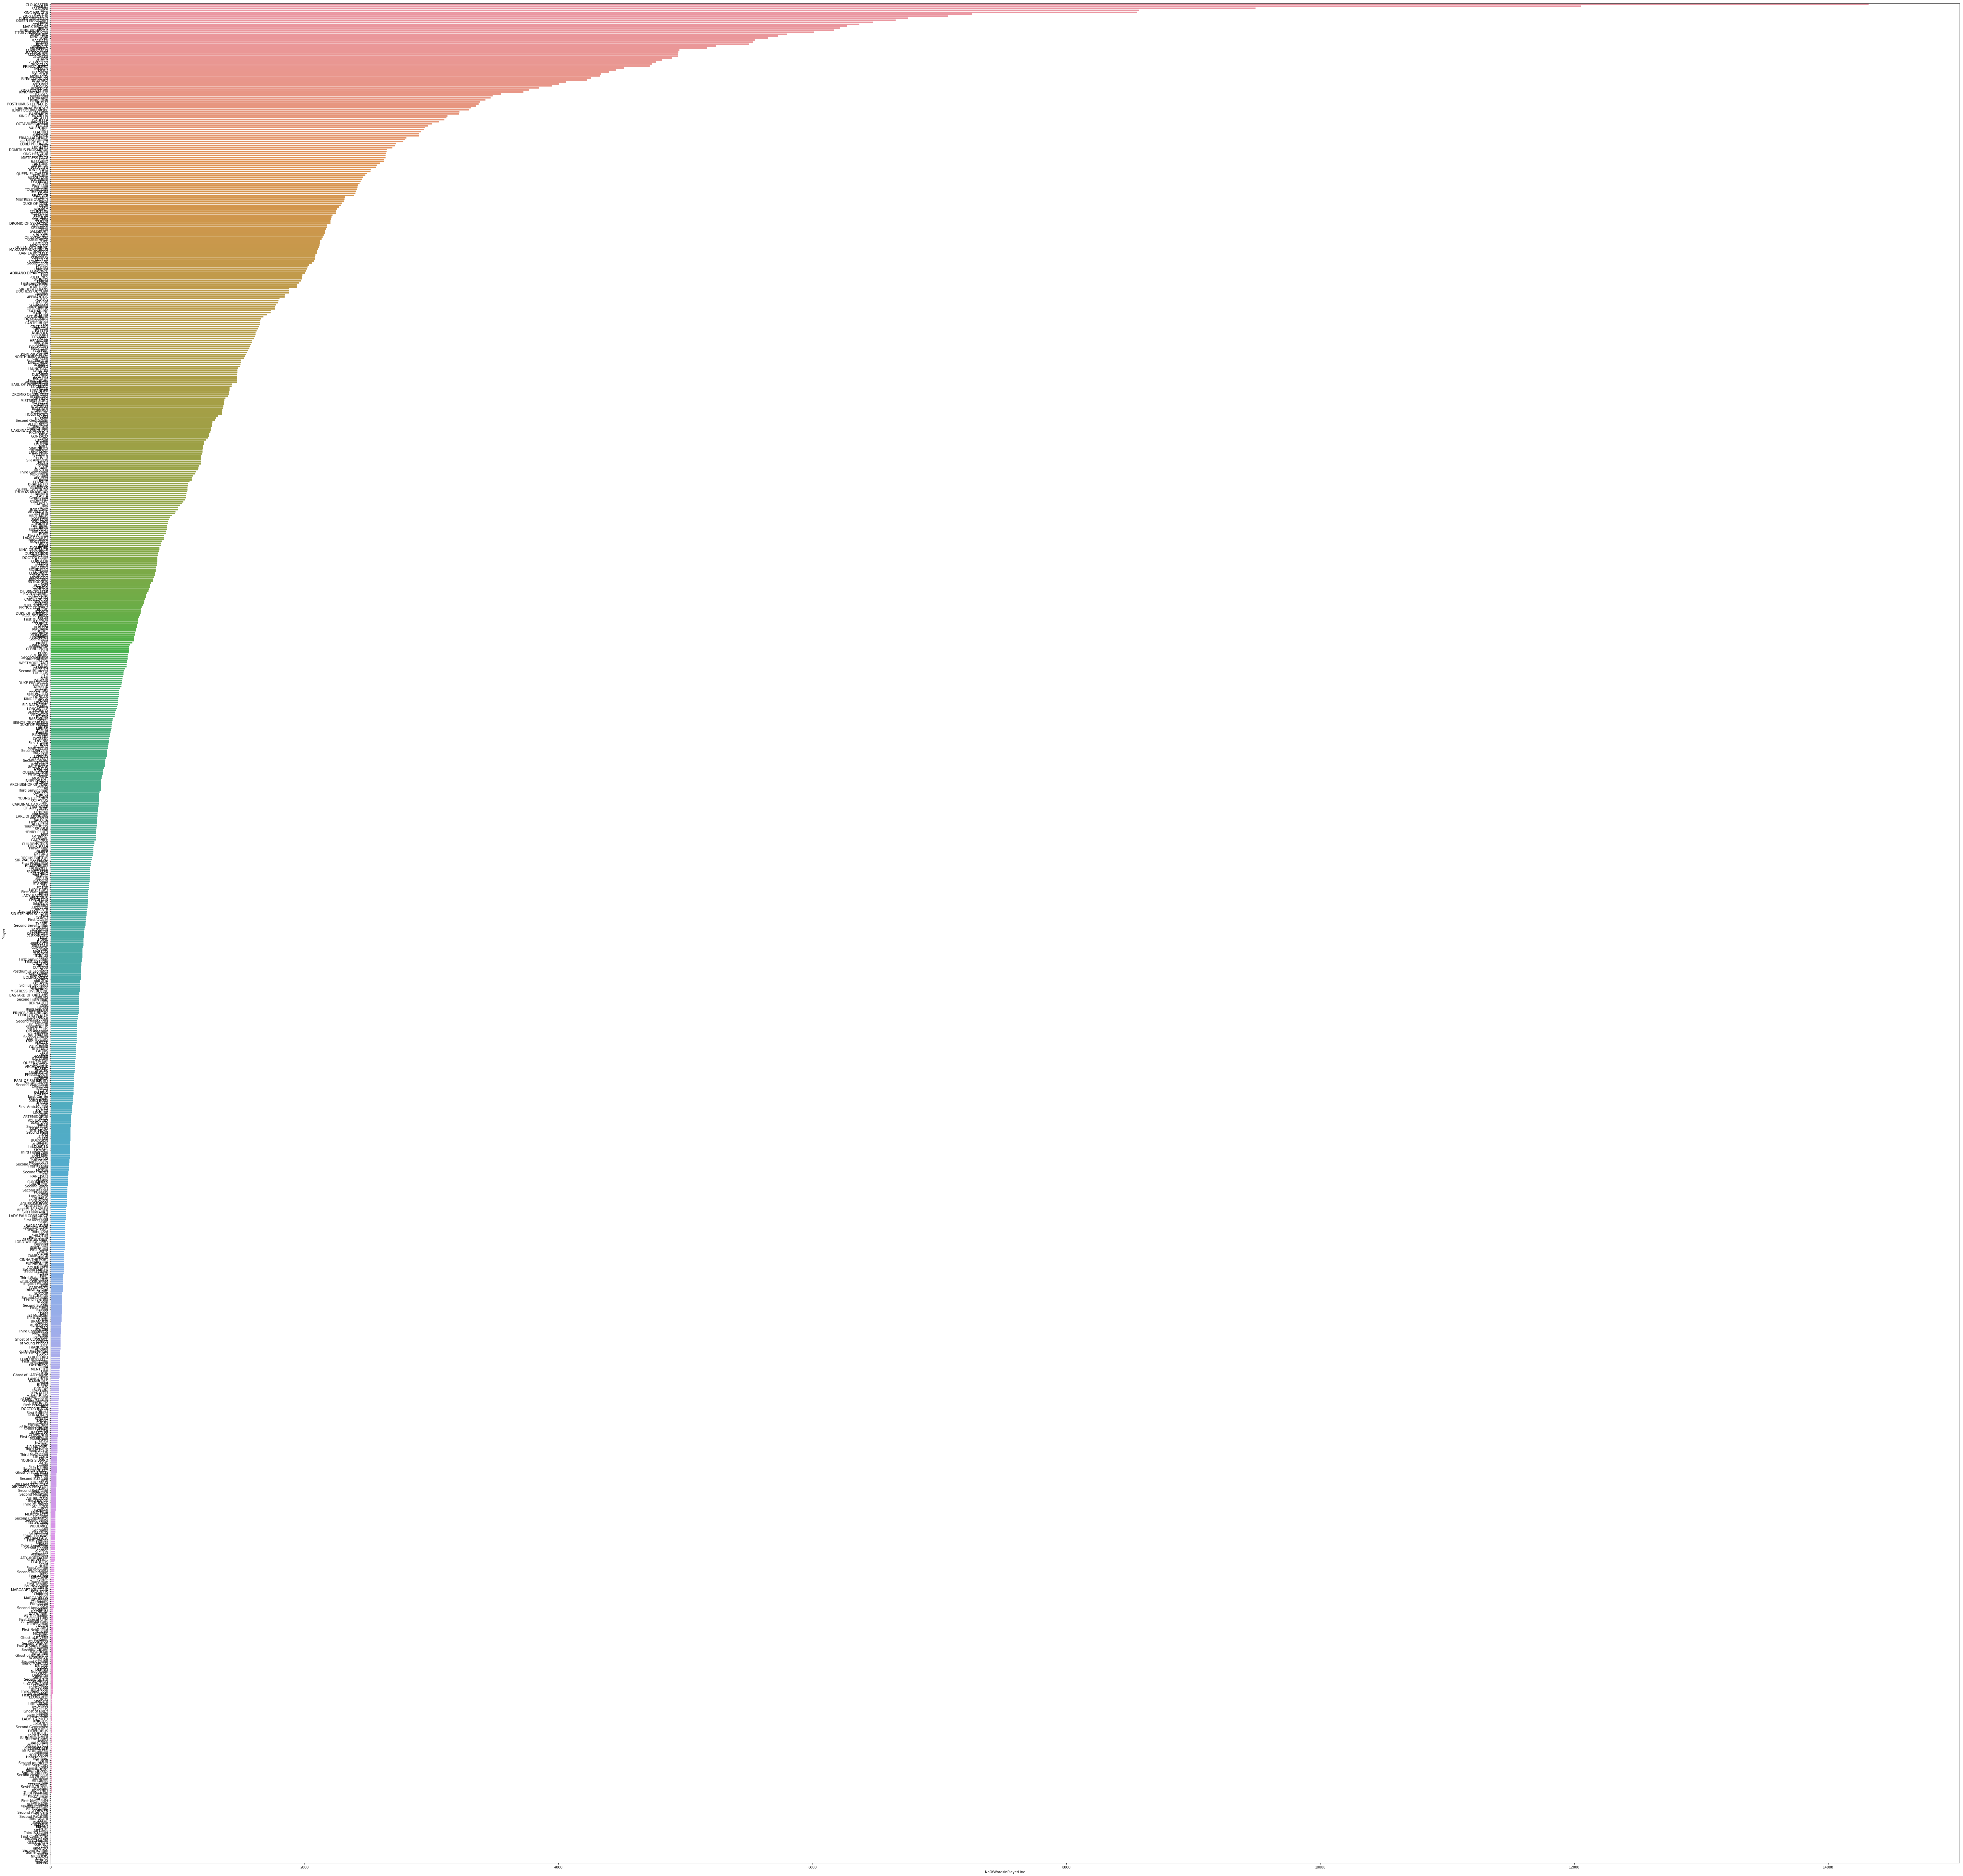

In [144]:
plt.figure(figsize=(100,100))
ax= sns.barplot(x='NoOfWordsInPlayerLine',y='Player',data=importantPlayer)
ax.set(xlabel='NoOfWordsInPlayerLine', ylabel='Player')
plt.show()
